In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.  
Some relevant columns in the dataset:  
•Date - The date of the observation  
•AveragePrice - the average price of a single avocado  
•type - conventional or organic  
•year - the year  
•Region - the city or region of the observation  
•Total Volume - Total number of avocados sold  
•4046 - Total number of avocados with PLU 4046 sold  
•4225 - Total number of avocados with PLU 4225 sold  
•4770 - Total number of avocados with PLU 4770 sold  

**Inspiration /Label**   
The dataset can be seen in two angles to find the region and find the average price .  
Task: One of Classification and other of Regression  


# Importing Dataset

In [2]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 1st\avocado.csv\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Unnamed: 0 seems to be a identifier column and needs to be removed.

In [4]:
print('total rows-',df.shape[0])
print('total columns-',df.shape[1])

total rows- 18249
total columns- 14


In [5]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

## Checking nulls 

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values.

# checking dataset info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


there are no null values in any of the columns,Dataframe have 3 columns with object type data, which we need to encode.

## checking description

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All the columns have count equal to 18249. Mean and median have high difference except for Average price stating that data has high skewness present. Difference between min, max and interquartile ranges is uneven hence there are outliers present in the data.

# Graphical Analysis

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

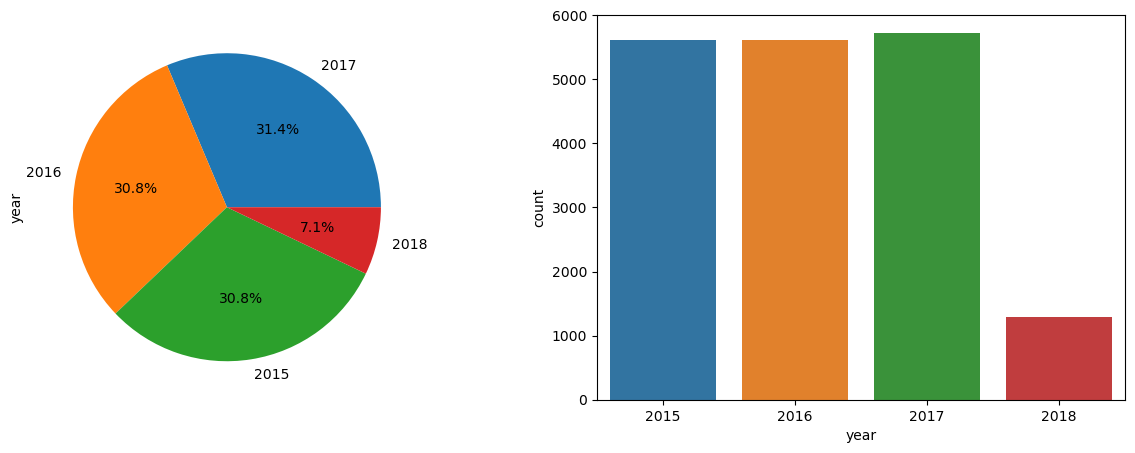

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

conventional    9126
organic         9123
Name: type, dtype: int64

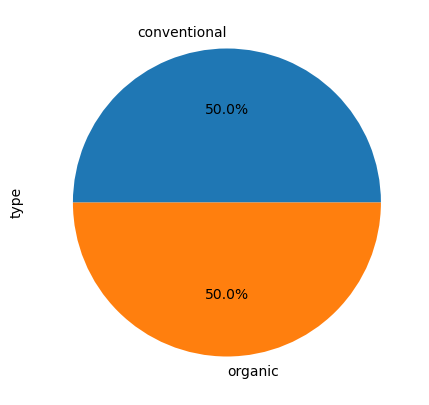

In [10]:
plt.figure(figsize=(5,5))
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
df['type'].value_counts()


There two categories of avacado organic and conventional are almost equal and balanced.

Total number of regions 54


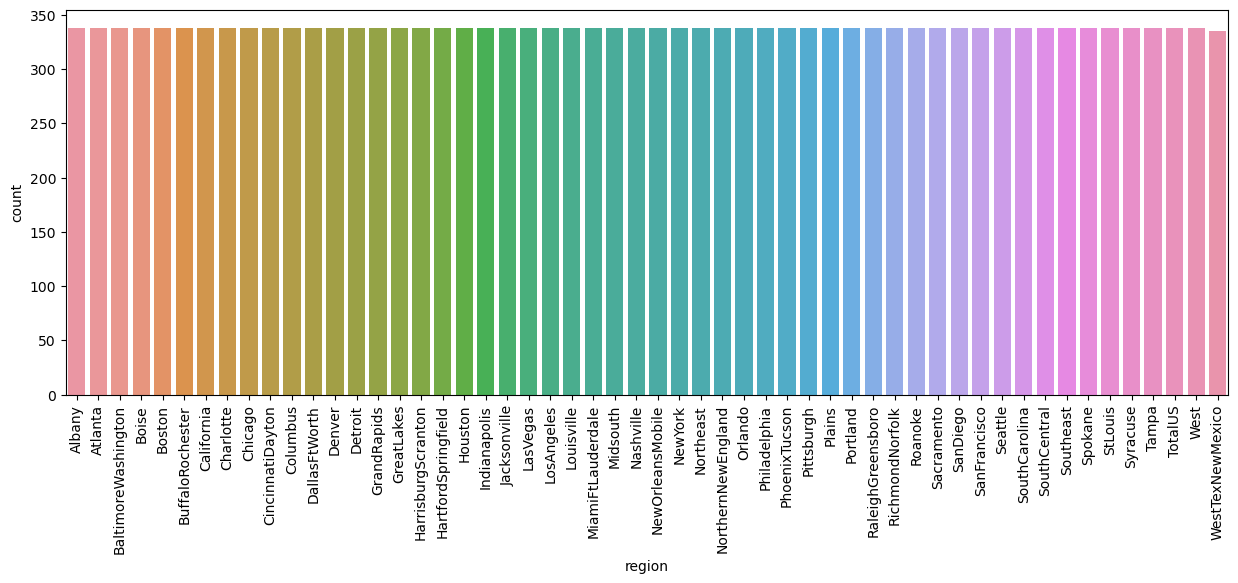

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

In [12]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

There are total 54 regions. All the region produces equal amounts of avocados except for west tex new mexico which has slightly less number.

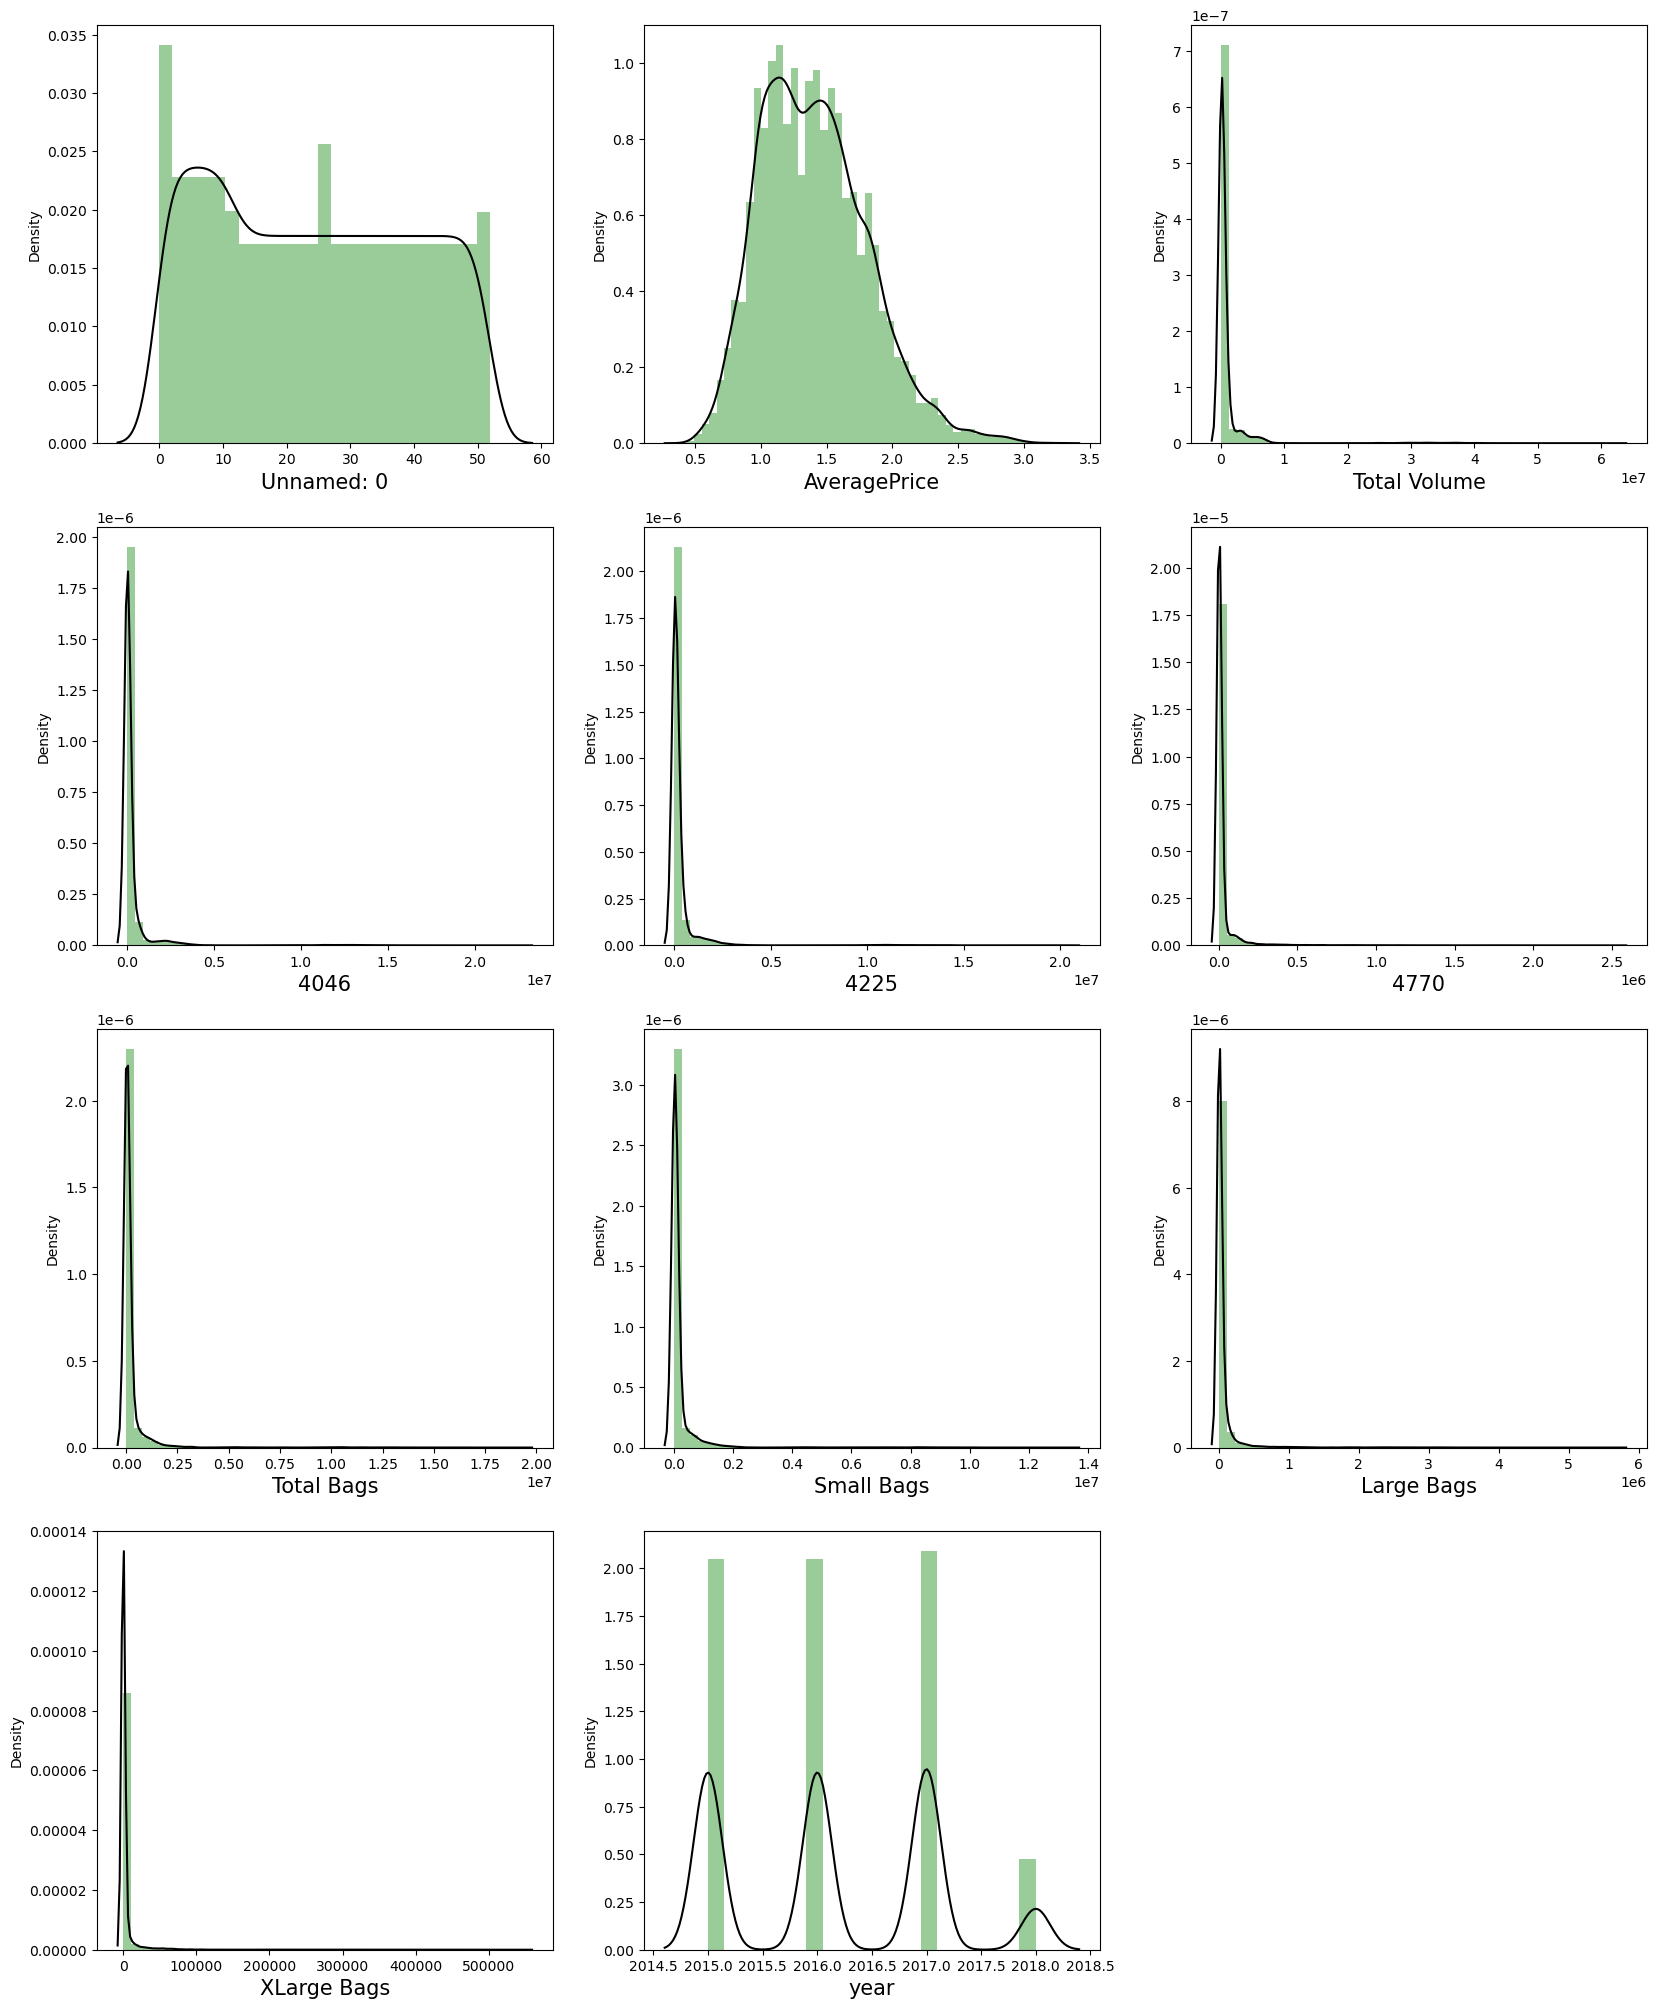

In [13]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.distplot(df[i],color='g',kde_kws={"color": "k"})
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show() 

1. Average price of avacados little skewed, price ranging from 0.44 t0 3.25
1. Most of the Total volume of Avacados is concentrated below 1e7 volumes while it goes upto 62505646.52 volumes. Data is higly skewed to the right, which needs to be taken care of ahead.
1. Avacados with Product look up code 4046 is mostly concentrated near the minimum whereas the range goes up to 22743616.17. Data is higly skewed to the right, which needs to be taken care of ahead.
1. Avacados with Product look up code 4225 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 20470572.61 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.
1. Avacados with Product look up code 4770 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 2546439.11 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process
1. Total bags has most of its density near to its minimum value and goes up to a range of 19373134.37 with its maximum value. Data is clearly skewed to the right.
1. Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 13384586.8 with its maximum value. Data is clearly skewed to the right.
1. Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 5719096.61 with its maximum value. Data is clearly skewed to the right.
1. Xtra large bags are densely populated in the range 0 to 5000, whereas they are spread till values more than 5 lakh. Distribution of data is highly right skewed.

# Checking for Outliers

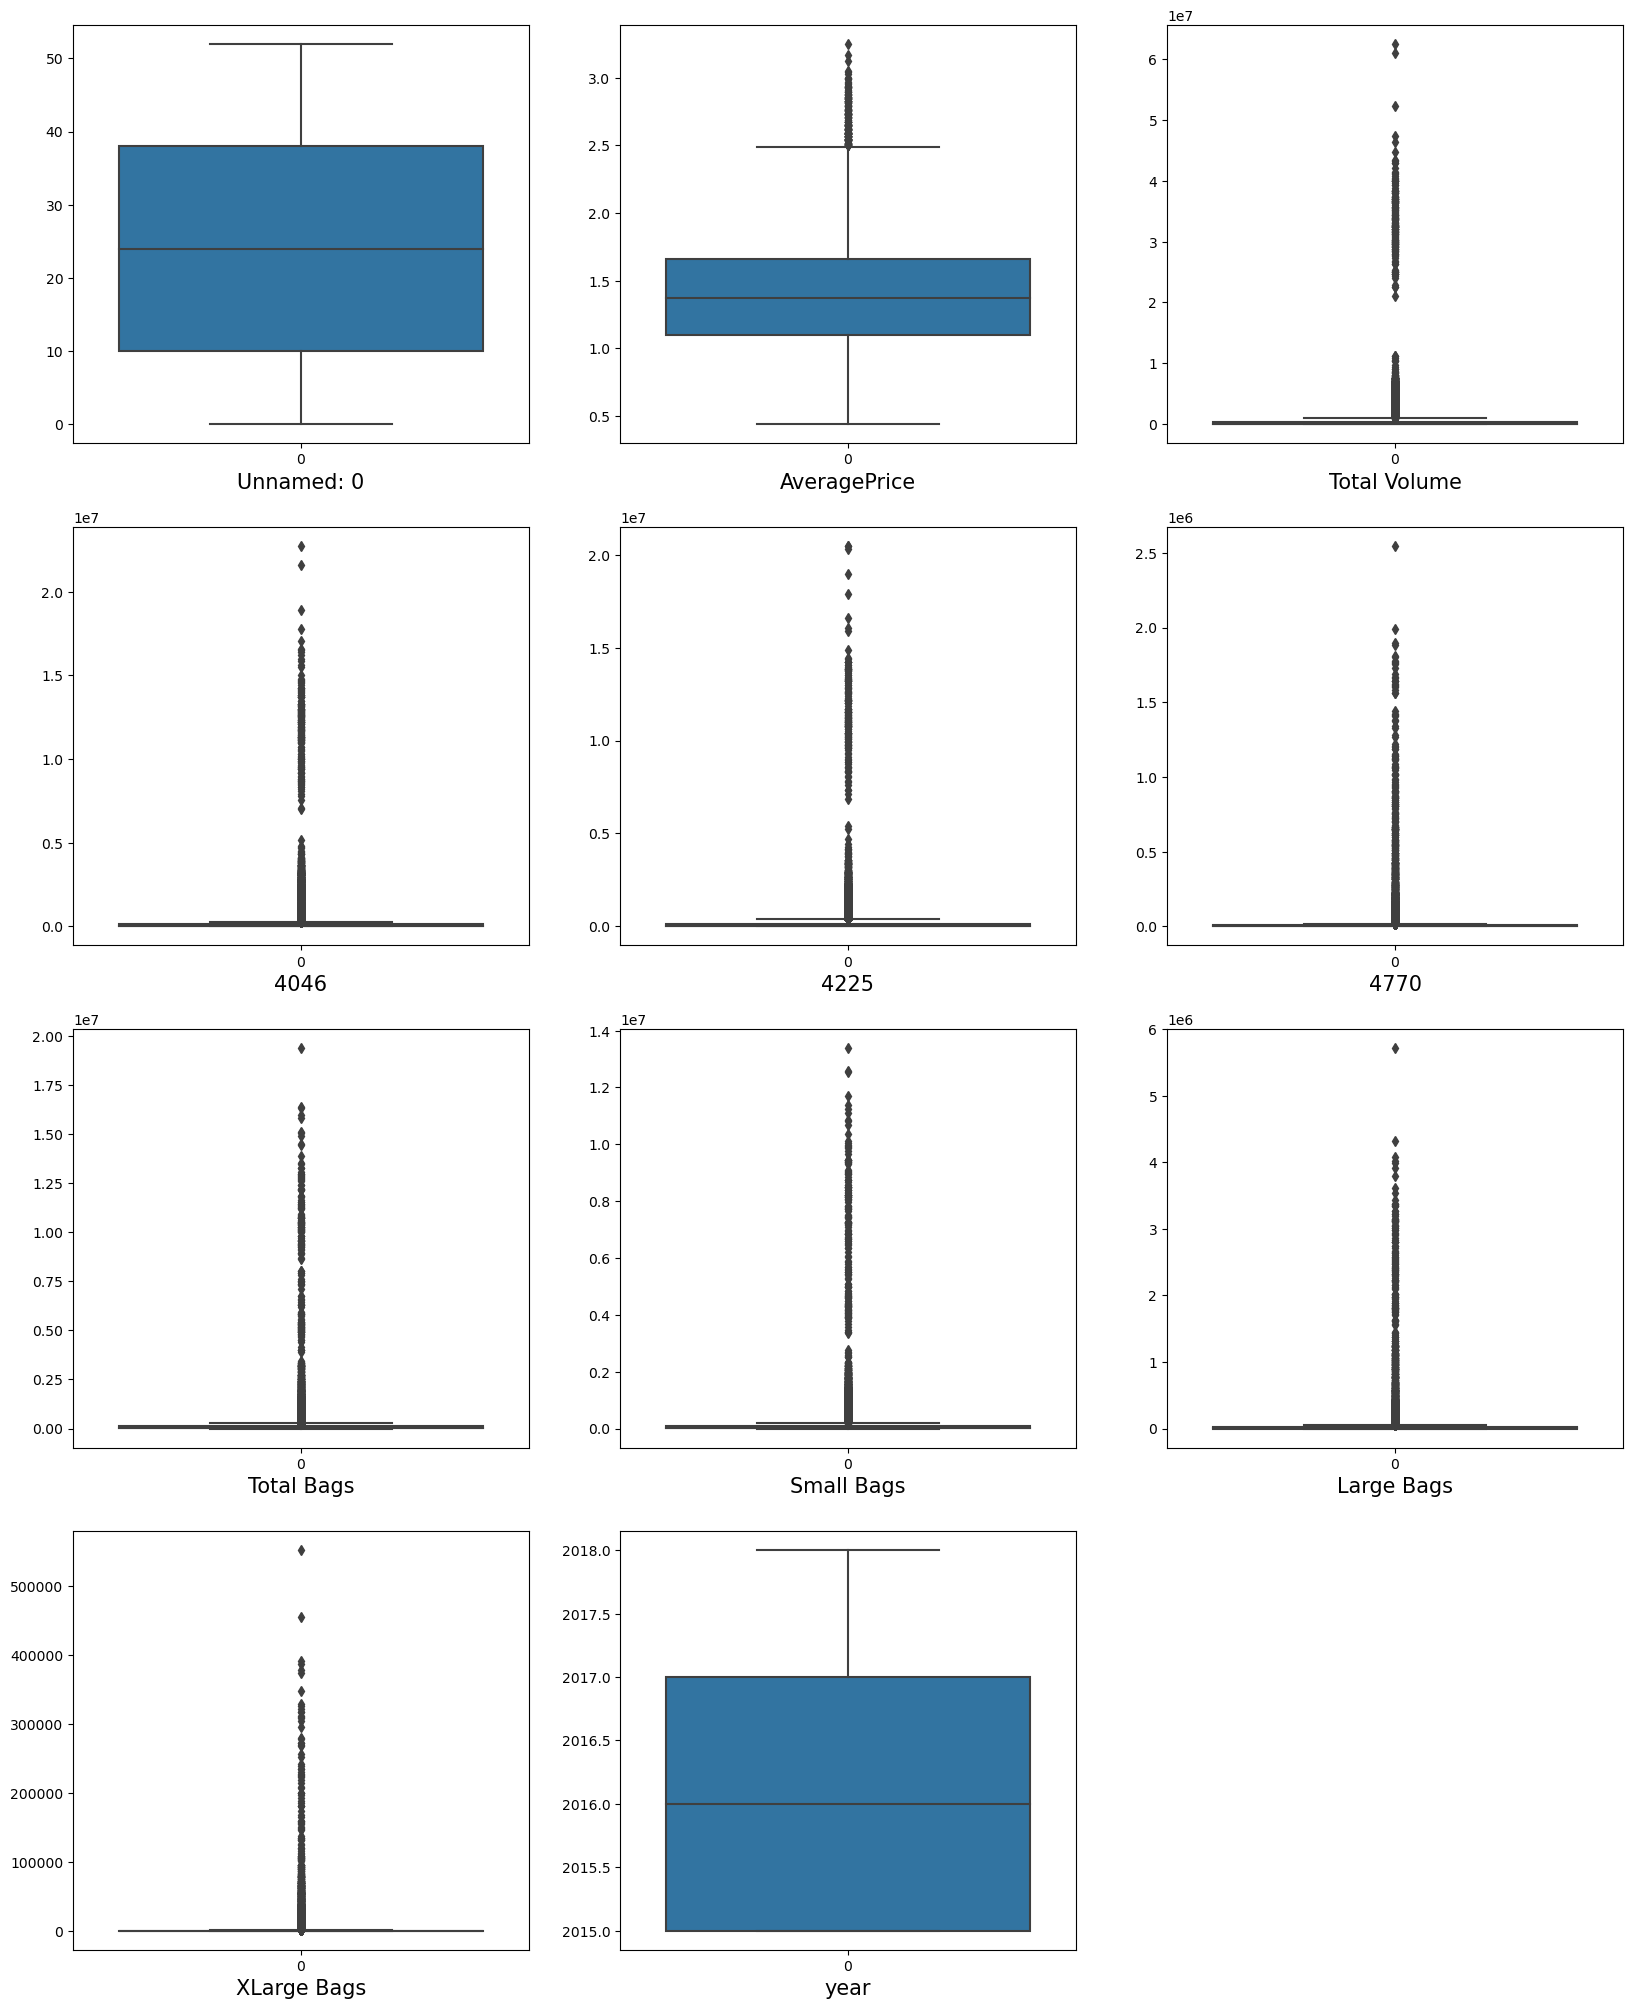

In [14]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

There are a large number of outliers present in all the features that is needed to be removed.

# Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

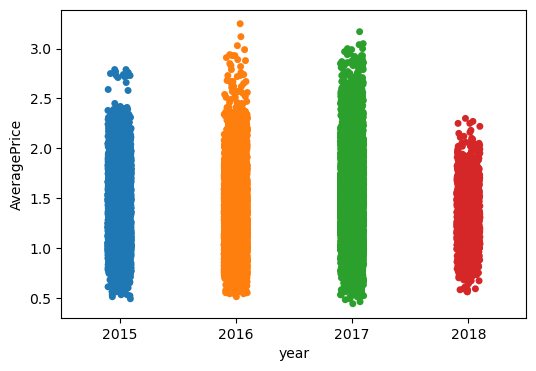

In [15]:
plt.figure(figsize=(6,4))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018.

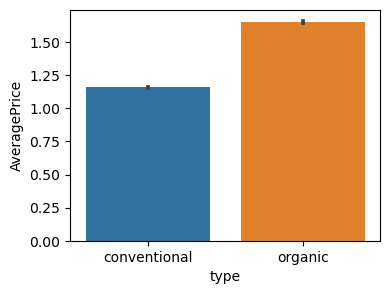

In [16]:
plt.figure(figsize=(4,3))
sns.barplot(x='type',y='AveragePrice',data=df)
plt.show()

Organic Avacoados are more expensive than the conventional ones.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

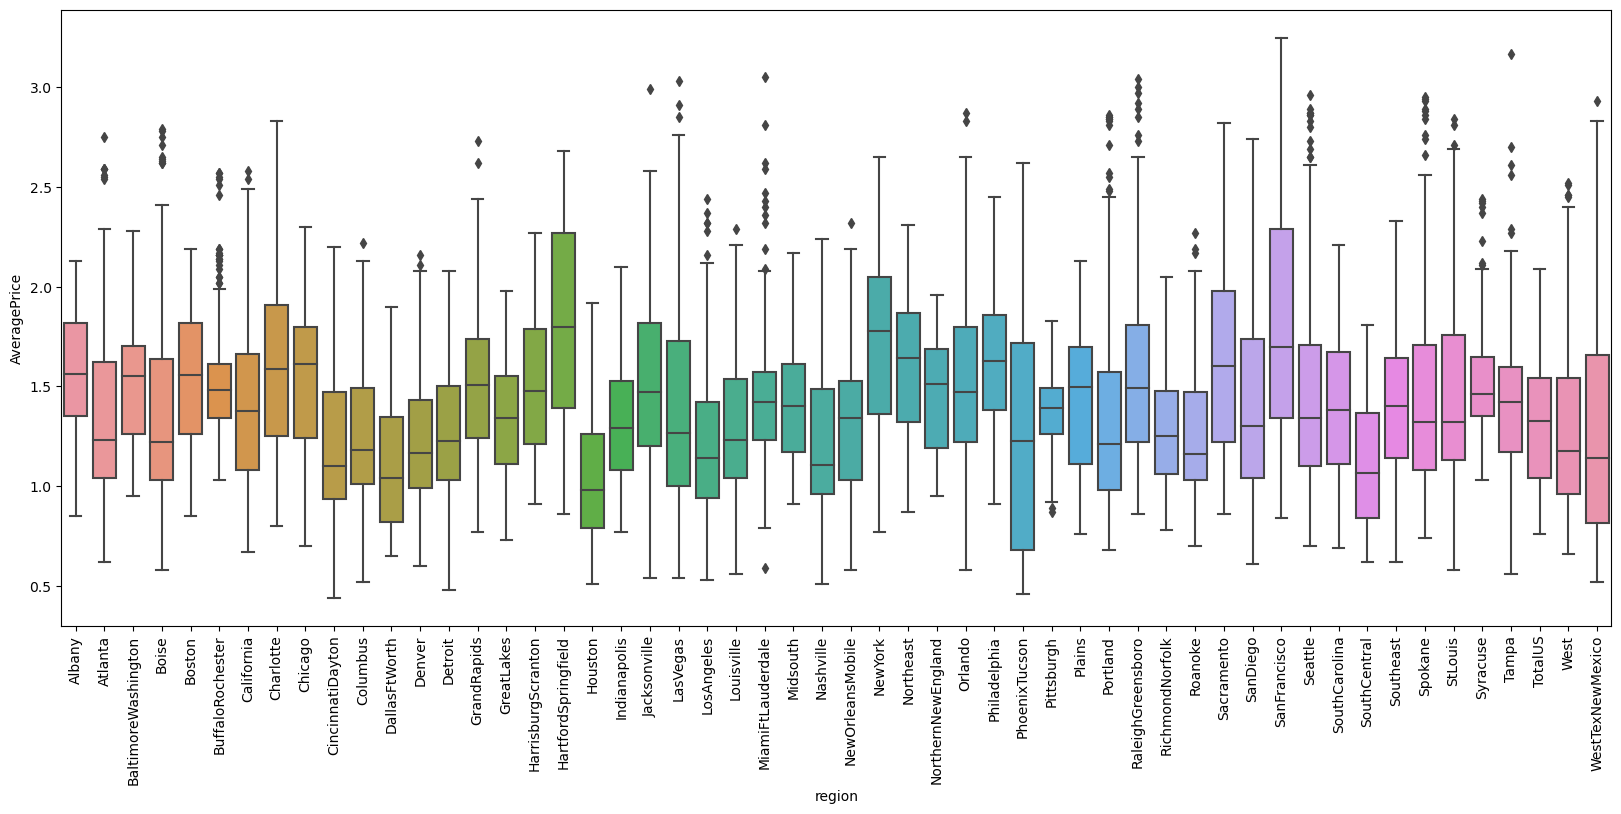

In [17]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

In [18]:
#We separate categorical and continuous features
cat=['year','region','type']
cont=[ 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

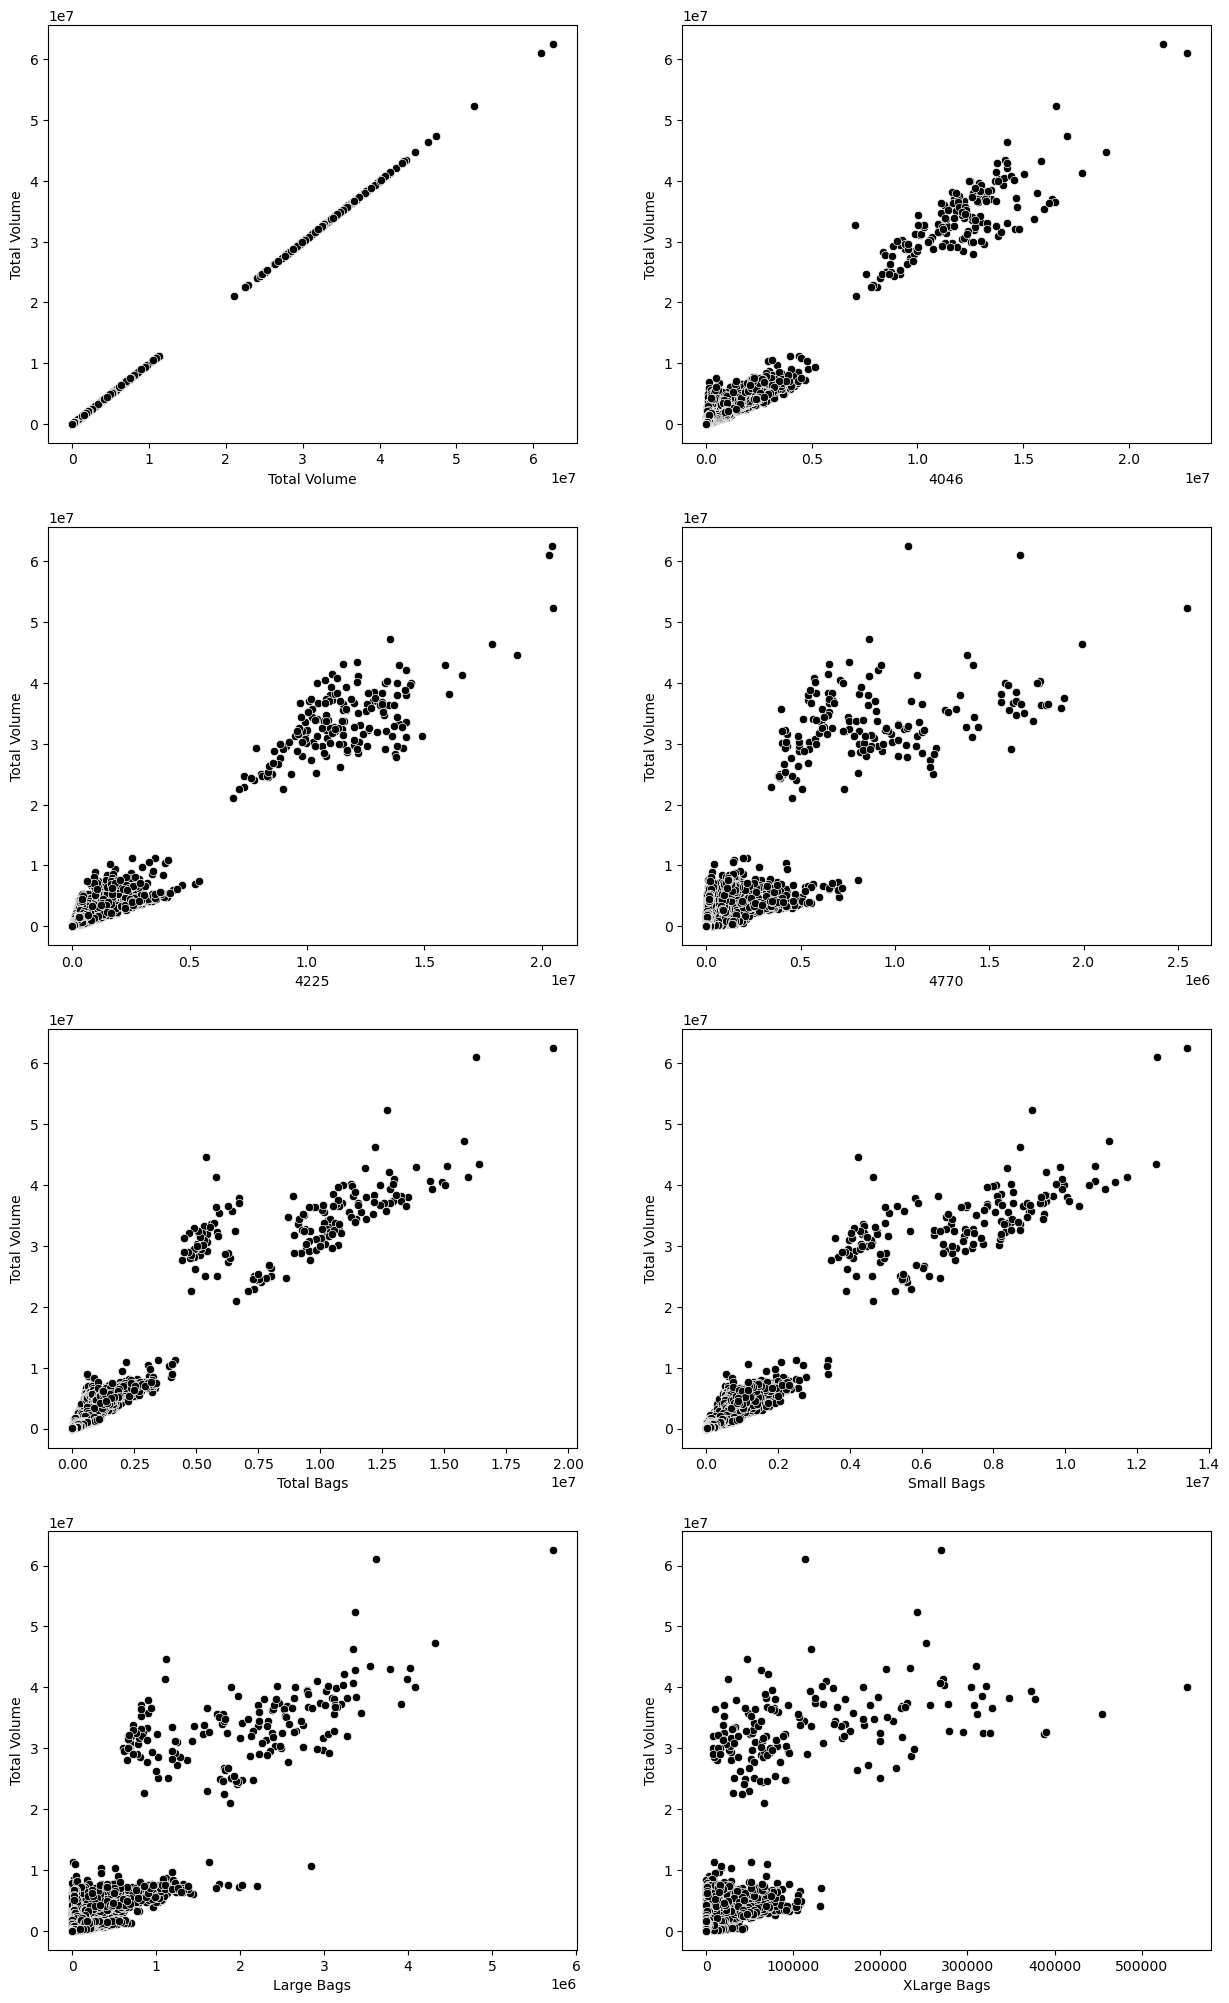

In [19]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='Total Volume',data=df,ax=ax[r,c],color='k')
    c+=1

With the increase in total volumes of avacado, quatity of all types of bags as well as PLU's also increases. This is logical as if volume of avacado's increases, no. of bags needed to carry it and PLU's inreases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

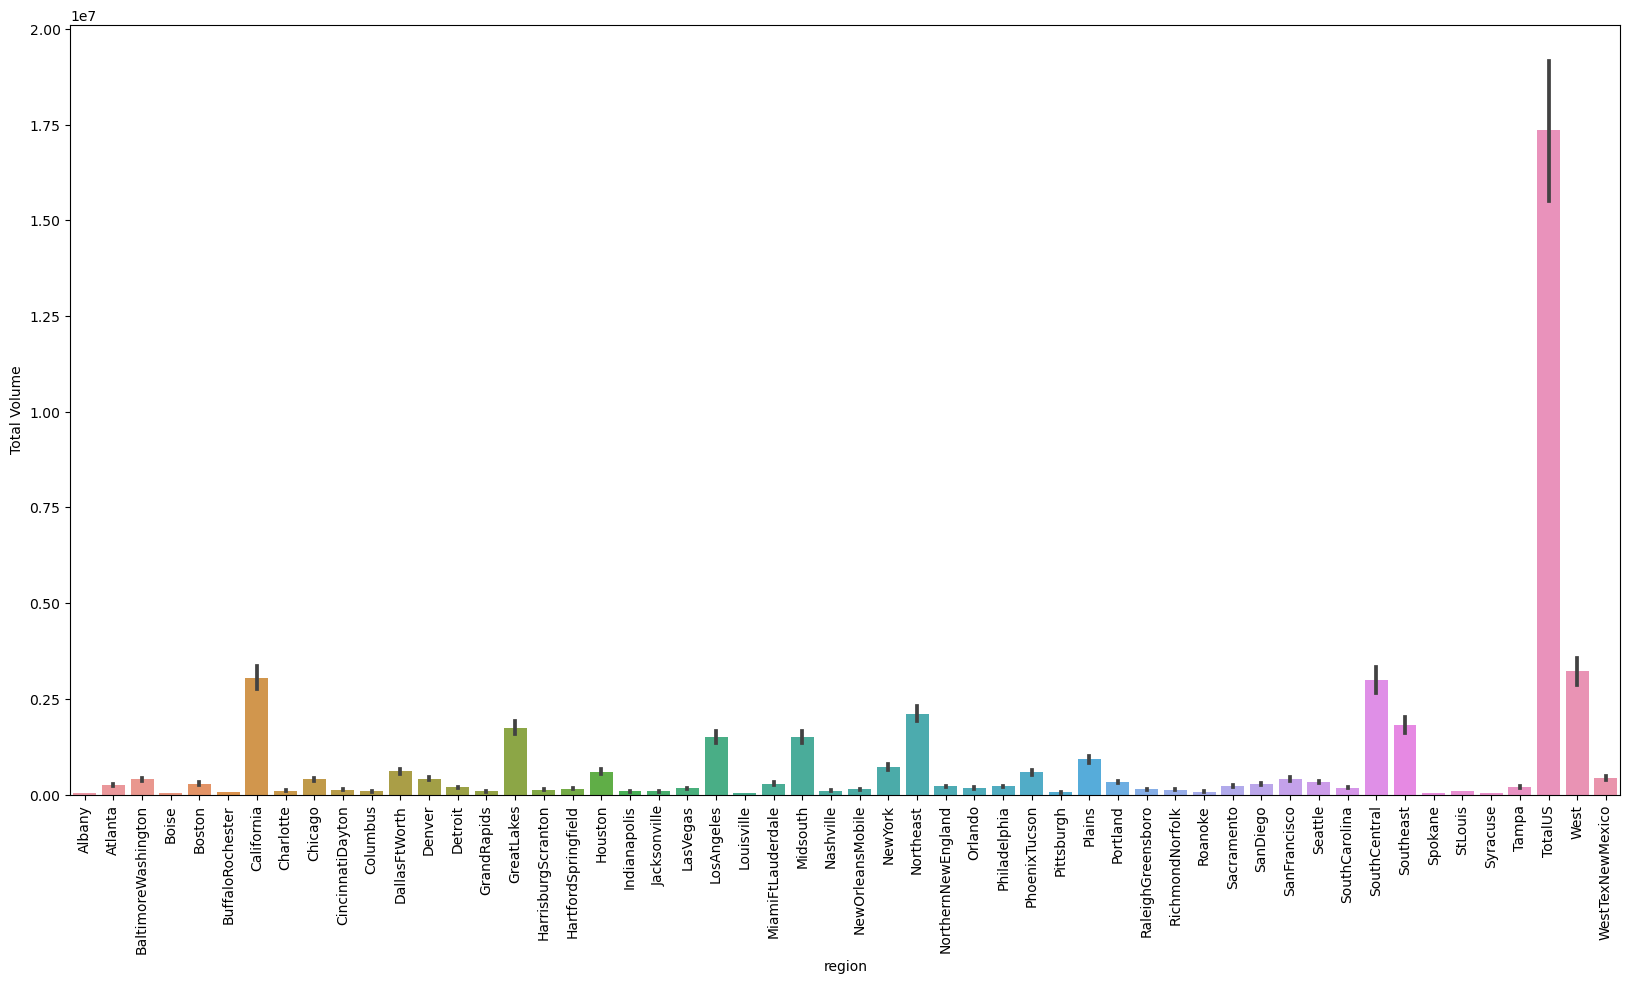

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)

Highest volumes of avacado's are found in the US. That could be the reason price of avacado's low there. As supply increases price decreases,whereas region with less volume such as las vegas have the highest price of avacado's.

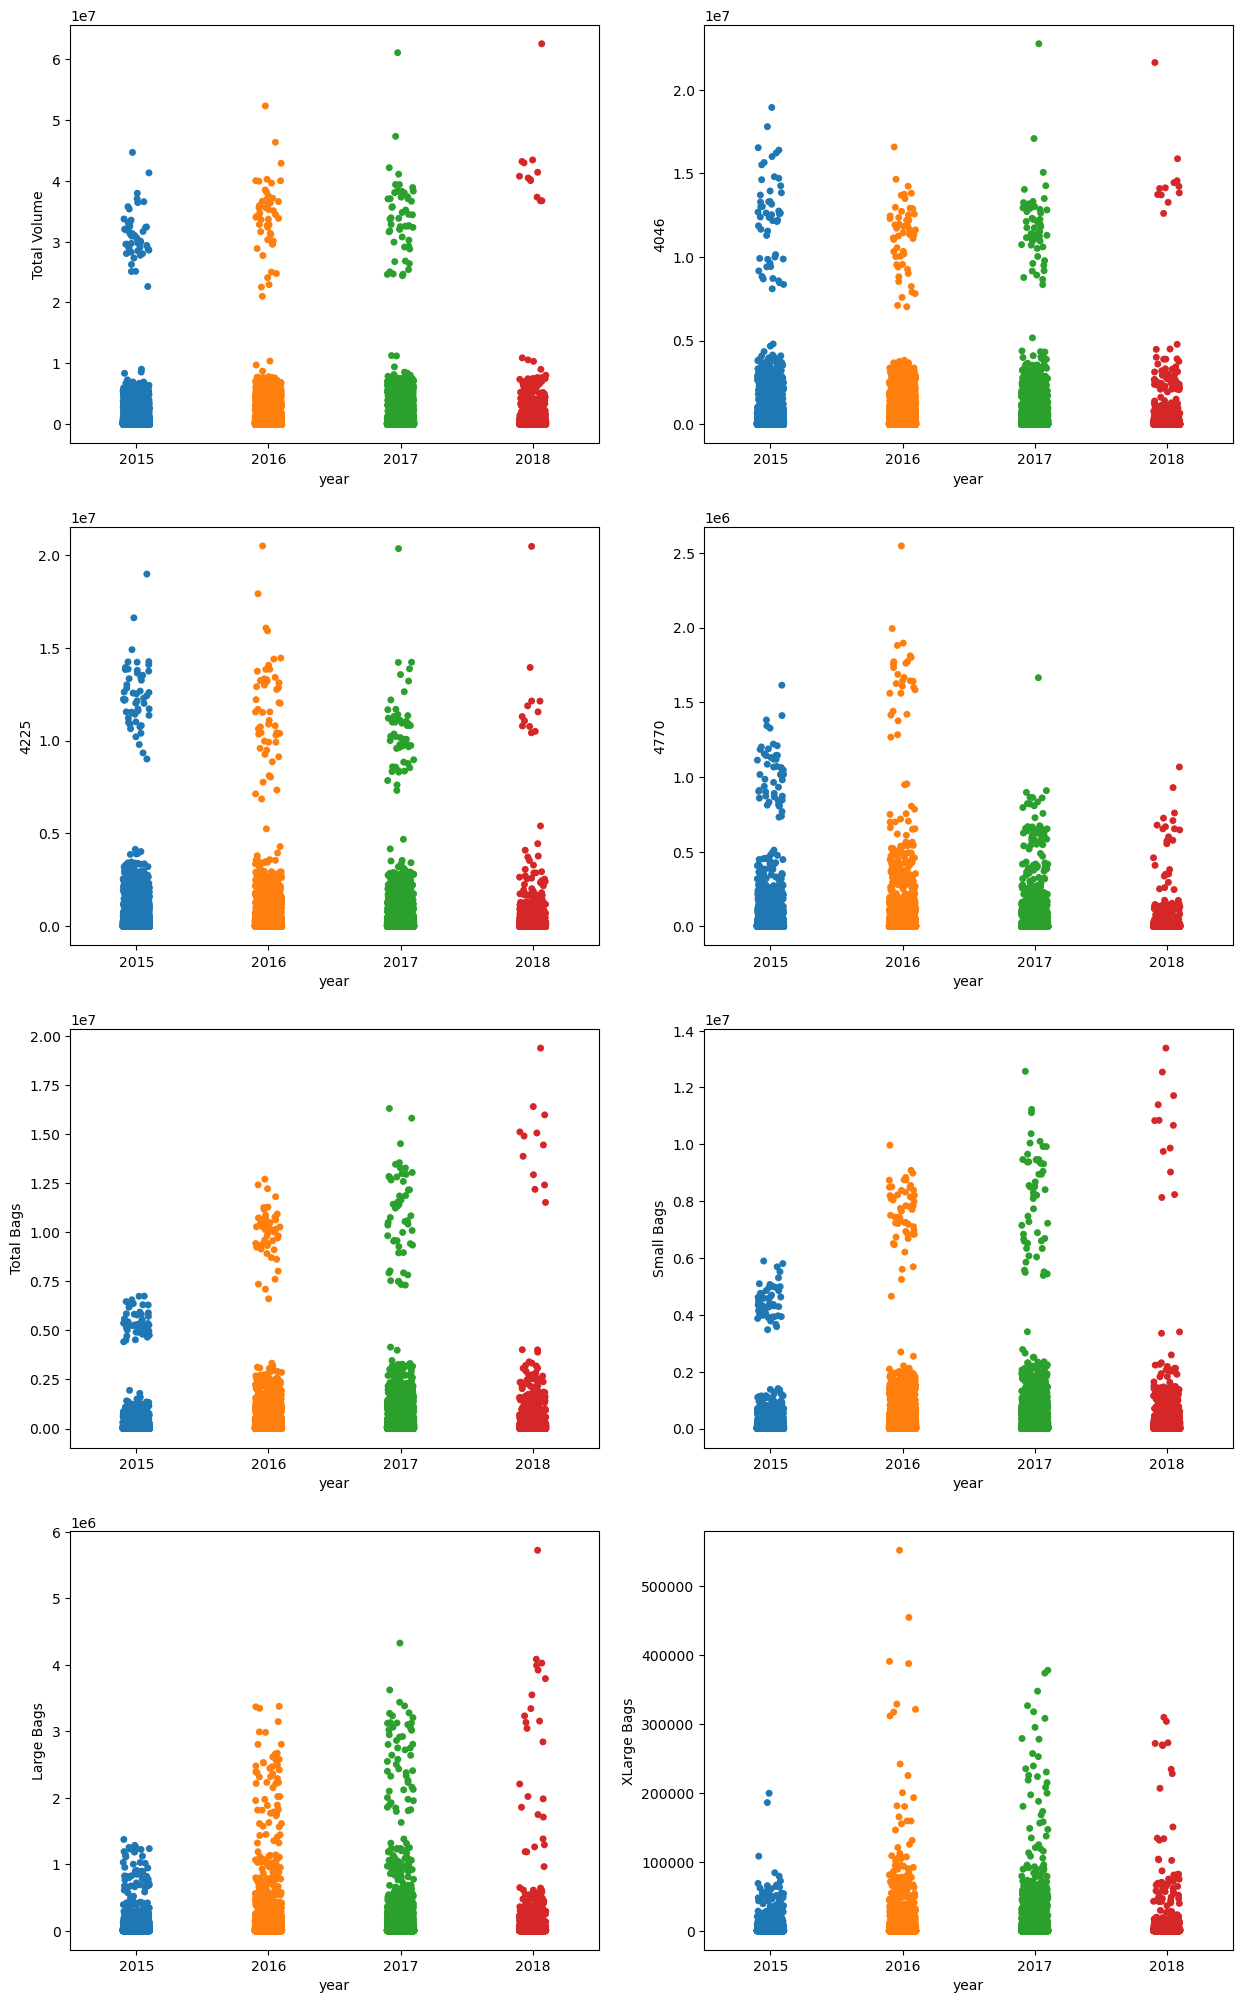

In [21]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.stripplot(x='year',y=n,data=df,ax=ax[r,c])
    c+=1

Though data for the year 2018 is very low but we can see that total volume, types of bags and PLUs are highest for 2018. As the time has passed volumes, bags to carry avocados have increased without any doubt.

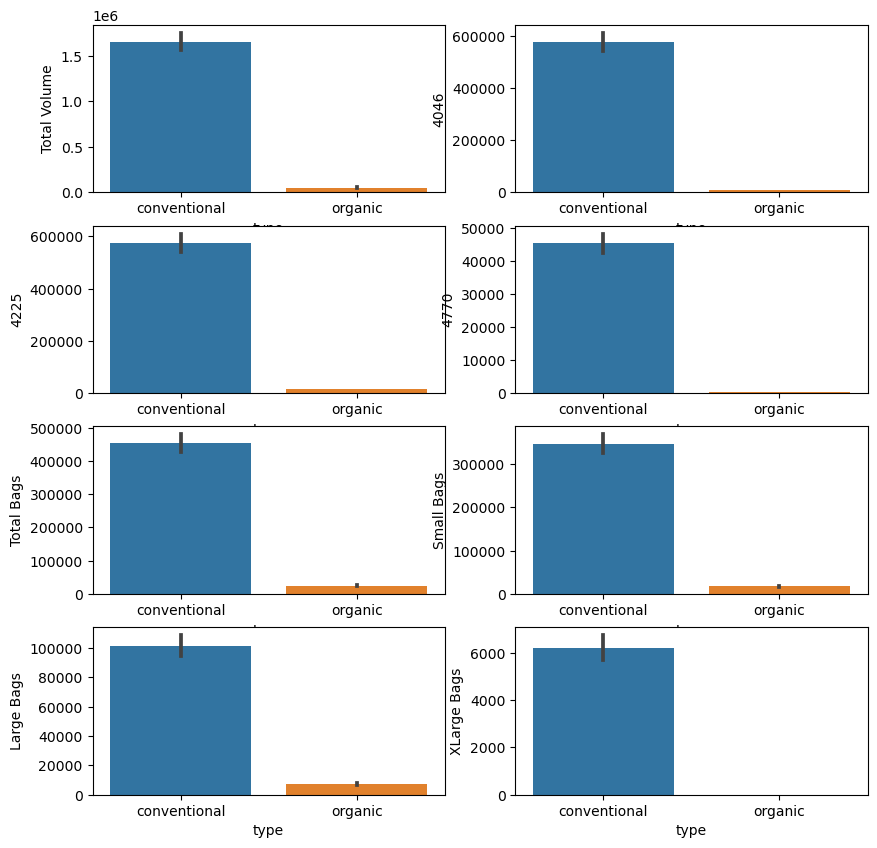

In [22]:
fig,ax=plt.subplots(4,2,figsize=(10,10))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.barplot(x='type',y=n,data=df,ax=ax[r,c])
    c+=1

Toal volumes. types of bags, and PLU's are all high for convetional type of avocados, this states that although price of organic type is high but cobventional types of avocados are more produced.

# Multivariate Analysis

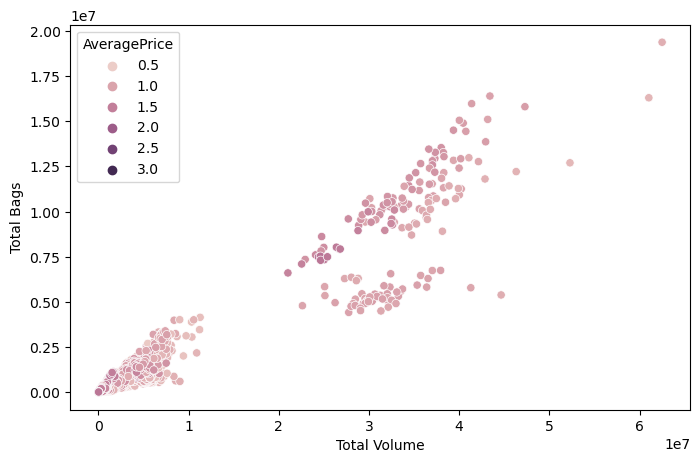

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total Volume',y='Total Bags',hue='AveragePrice',data=df)
plt.show()

As the total volume increases, Total bags also increases to carry it, but the average price seems to decrease. but When the volumes of avacados are low, average price increases of avacados.

<AxesSubplot:>

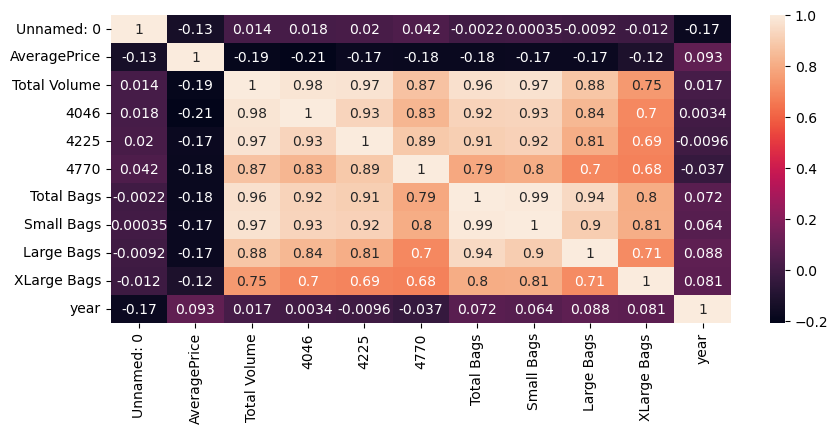

In [24]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

Average price shows positive relationship with the year column, while negative correlation with all the other columns. Independent features show more than 90% correlation with each other. This is a case of multicollinearity. We need to remove some features to resolve this problem.

# visualizing the correlation between label and features using bar plot

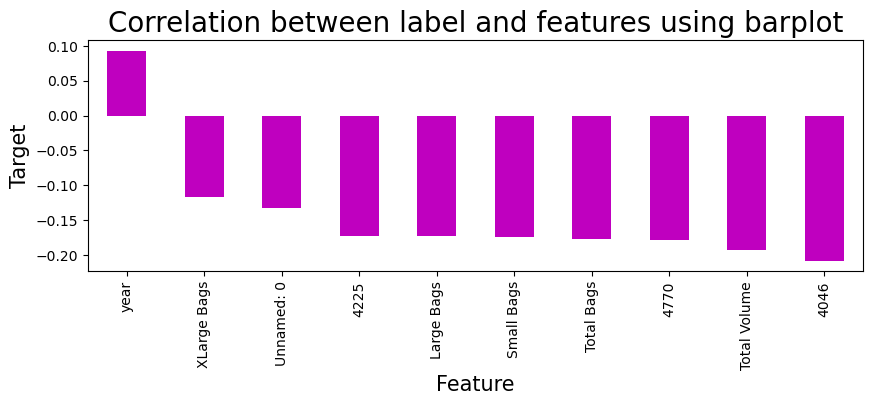

In [25]:
plt.figure(figsize=(10,3))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

all the features have very less correlation with target, almost zero relation with the target 

# Feature Engineering

## Removing unwanted columns

In [26]:
#year column also need to be removed as we already have date column.
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [27]:
# Handling date column
#Converting date column into datetime format
df['Date']=pd.to_datetime(df['Date'])

In [28]:
#Extracting month, day and year info from date column then dropping it.
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

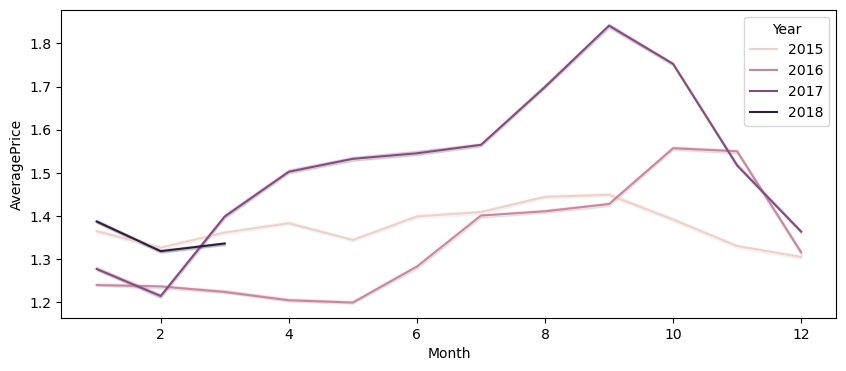

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',ci=18,data=df)

Average price of avacado's is high in the month of September October November. As the season for avocado's is in the summer, off season fruit is expensive. We have data for year 2018 till march only

In [30]:
#We replace 2015 by 1 and 2016 by 2 for more simplicity
df['Year'].replace(2015,1,inplace=True)
df['Year'].replace(2016,2,inplace=True)
df['Year'].replace(2017,3,inplace=True)
df['Year'].replace(2018,4,inplace=True)

In [31]:
#we create a time column using year,month and day column and then drop these 3.
df['Time']=(df['Year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['Year','Month','Day'],axis=1,inplace=True)

# Encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [33]:
df['region']=OE.fit_transform(df['region'].values.reshape(-1,1))
df['type']=OE.fit_transform(df['type'].values.reshape(-1,1))

# Removing Outliers

In [34]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [35]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 3.28%
With threshold 3.01 data loss is 3.27%
With threshold 3.02 data loss is 3.19%
With threshold 3.03 data loss is 3.17%
With threshold 3.04 data loss is 3.14%
With threshold 3.05 data loss is 3.13%
With threshold 3.06 data loss is 3.12%
With threshold 3.07 data loss is 3.09%
With threshold 3.08 data loss is 3.07%
With threshold 3.09 data loss is 3.03%
With threshold 3.1 data loss is 3.0%
With threshold 3.11 data loss is 3.0%
With threshold 3.12 data loss is 2.95%
With threshold 3.13 data loss is 2.94%
With threshold 3.14 data loss is 2.89%
With threshold 3.15 data loss is 2.89%
With threshold 3.16 data loss is 2.88%
With threshold 3.17 data loss is 2.85%
With threshold 3.18 data loss is 2.84%
With threshold 3.19 data loss is 2.83%
With threshold 3.2 data loss is 2.81%
With threshold 3.21 data loss is 2.8%
With threshold 3.22 data loss is 2.78%
With threshold 3.23 data loss is 2.76%
With threshold 3.24 data loss is 2.73%
With threshold 3.25 data loss i

In [36]:
#We use threshold as 3.57 because we cannot afford to loose much data
df=df[(z<3.57).all(axis=1)]

# Removing Skewness

In [37]:
cont.append('Time')
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [38]:
#We make use of power transformer to remove skewness from all columns except from Total volume as it was incapable
for i in cont:
    if np.abs(df[i].skew())>0.5 and i!='Total Volume':
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

# To remove skewness from total volume column we ise log transformation
df['Total Volume']=np.log(df['Total Volume'])

In [39]:
df.skew()

AveragePrice    0.489112
Total Volume   -0.032168
4046           -0.037678
4225           -0.042688
4770            0.025921
Total Bags     -0.019751
Small Bags     -0.022505
Large Bags     -0.107871
XLarge Bags     0.842951
type           -0.035187
region          0.009740
Time            0.009355
dtype: float64

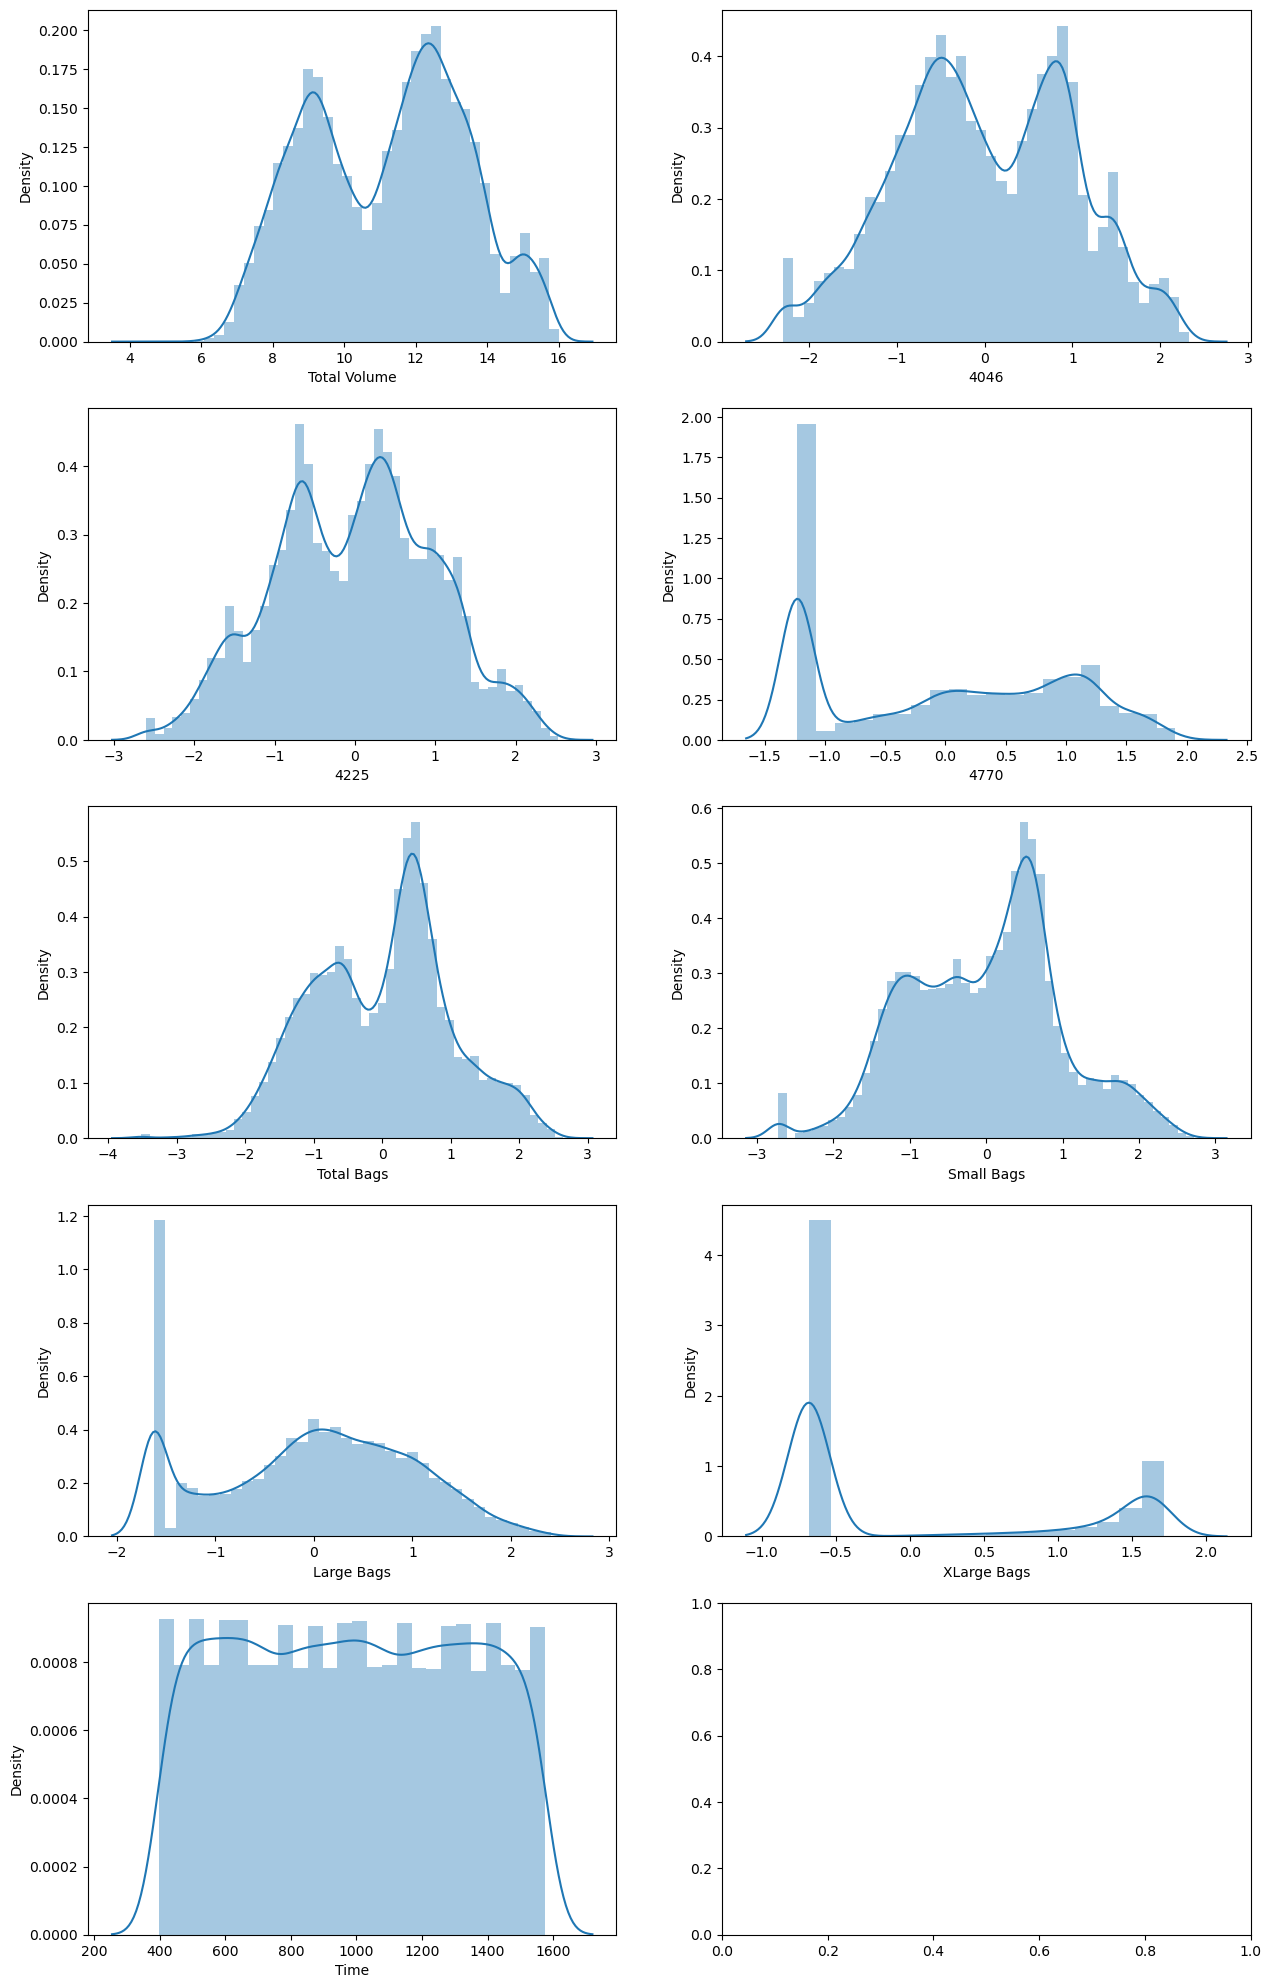

In [40]:
fig,ax=plt.subplots(5,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if r==4 and c==1:
        break
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

Skewness is almost negligible after using tranformations techniques. Only XLarge bags shows skewness in graph but it is still reduced considerably.

# Separating the dependent and independent variables.

In [41]:
x=df.copy()
x.drop('AveragePrice',axis=1,inplace=True)

y=df['AveragePrice']

# Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Time
0,-0.068074,-0.656680,0.343354,-0.225265,-0.533827,-0.345079,-0.780539,-0.681835,-1.017747,-1.696085,-0.677245
1,-0.139766,-0.776088,0.262291,-0.178119,-0.494873,-0.309394,-0.770600,-0.681835,-1.017747,-1.696085,-0.697769
2,0.209618,-0.730804,0.637769,0.020112,-0.562384,-0.371810,-0.757946,-0.681835,-1.017747,-1.696085,-0.718293
3,0.026061,-0.631939,0.459419,-0.124295,-0.707629,-0.506936,-0.698663,-0.681835,-1.017747,-1.696085,-0.738818
4,-0.172768,-0.683674,0.254978,-0.113669,-0.681126,-0.486680,-0.606800,-0.681835,-1.017747,-1.696085,-0.759342
...,...,...,...,...,...,...,...,...,...,...,...
17847,-0.671265,-0.462146,-0.926620,-1.229296,-0.338978,-0.175485,-0.412871,-0.681835,0.982563,1.741839,1.586262
17848,-0.765309,-0.617420,-0.671611,-1.229296,-0.506134,-0.329805,-0.485169,-0.681835,0.982563,1.741839,1.568670
17849,-0.769302,-0.617367,-0.779654,0.439501,-0.500053,-0.311799,-0.949982,-0.681835,0.982563,1.741839,1.548146
17850,-0.695062,-0.546697,-0.717264,0.439192,-0.431634,-0.249204,-0.915318,-0.681835,0.982563,1.741839,1.527622


In [43]:
# finding variance inflation factor in each scaled column i.e, x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,50.259581,Total Volume
1,7.103059,4046
2,11.007347,4225
3,4.012548,4770
4,34.557496,Total Bags
5,16.764950,Small Bags
6,3.477726,Large Bags
7,2.083156,XLarge Bags
8,3.709938,type
9,1.085927,region


there is multicollinearity exsists but we cannot delete any of the features because it decreases our model performance

# finding the best random state

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [45]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS)

 Maximum r2 score is 0.566777909224689 on random_state 181


# creating train test split

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Modelling

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.566777909224689
R2_score on training Data: 54.39105450284214
Mean absolute error: 0.20518519265018745
Mean squared error: 0.06891086523186897
Root Mean absolute error: 0.26250879077065015


In [49]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rfr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("Mean squared error:",mean_squared_error(y_test,pred_rfr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.9038910993144484
R2_score on training Data: 98.56257630152069
Mean absolute error: 0.08625576923076922
Mean squared error: 0.015287649553771468
Root Mean absolute error: 0.12364323496969605


In [50]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.8721917988941192
R2_score on training Data: 91.65872233248076
Mean absolute error: 0.09938797610156834
Mean squared error: 0.020329927557879015
Root Mean absolute error: 0.14258305494650833


In [51]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_gbr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_gbr))
print("Mean squared error:",mean_squared_error(y_test,pred_gbr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 score: 0.7767267257023989
R2_score on training Data: 78.04830269044709
Mean absolute error: 0.14246412175033485
Mean squared error: 0.03551516610675325
Root Mean absolute error: 0.18845467918508485


In [52]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.7863785386891753
R2_score on training Data: 100.0
Mean absolute error: 0.1214768483943241
Mean squared error: 0.03397989171023152
Root Mean absolute error: 0.18433635482517147


In [53]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred_Lasso=Lasso.predict(x_test)
pred_train=Lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_Lasso))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_Lasso))
print("Mean squared error:",mean_squared_error(y_test,pred_Lasso))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_Lasso)))

R2 score: -0.00011533472740810069
R2_score on training Data: 0.0
Mean absolute error: 0.3242489629541797
Mean squared error: 0.15908425381629585
Root Mean absolute error: 0.39885367469323363


In [54]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print("Mean squared error:",mean_squared_error(y_test,pred_rd))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.5667873074556865
R2_score on training Data: 54.39102000299143
Mean absolute error: 0.2051840705150371
Mean squared error: 0.06890937029372182
Root Mean absolute error: 0.2625059433493303


In [55]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared error:",mean_squared_error(y_test,pred_svr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: 0.7538228322398582
R2_score on training Data: 75.79754997283563
Mean absolute error: 0.14473471592441678
Mean squared error: 0.03915839471695082
Root Mean absolute error: 0.19788480163203748


In [56]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.9166222905472402
R2_score on training Data: 100.0
Mean absolute error: 0.07980690814040328
Mean squared error: 0.013262551060492903
Root Mean absolute error: 0.11516314975065983


In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_lr)-score.mean())*100)

[0.01820615 0.18258712 0.40077918 0.25497622 0.25500563]
0.22231085899688835
Difference between R2 score and cross validation score is 34.44670502278006


In [59]:
score1=cross_val_score(rfr,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rfr)-score1.mean())*100)

[0.4457426  0.59231745 0.64960656 0.40099713 0.07711982]
0.4331567127233896
Difference between R2 score and cross validation score is 47.07343865910588


In [60]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_knn)-score2.mean())*100)

[ 0.23410128  0.31428837  0.46386774  0.40929596 -0.0125554 ]
0.2817995904343373
Difference between R2 score and cross validation score is 59.03922084597819


In [61]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.51709431 0.6234332  0.64695654 0.43236508 0.26485977]
0.4969417794720565
Difference between R2 score and cross validation score is 27.97849462303424


In [62]:
score4=cross_val_score(dtr,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_dtr)-score4.mean())*100)

[-0.14030987  0.07459527  0.26198031 -0.11930208 -0.46303108]
-0.07721348960485575
Difference between R2 score and cross validation score is 86.3592028294031


In [63]:
score5=cross_val_score(Lasso,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_Lasso)-score5.mean())*100)

[-3.94870076 -0.68792399 -0.03739969 -0.42461385 -0.79644881]
-1.1790174177581505
Difference between R2 score and cross validation score is 117.89020830307425


In [64]:
score6=cross_val_score(rd,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rd)-score6.mean())*100)

[0.01812463 0.18255327 0.40087306 0.25514643 0.25488437]
0.22231635098127783
Difference between R2 score and cross validation score is 34.44709564744087


In [65]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_svr)-score7.mean())*100)

[-1.74209488  0.49200224  0.19276052  0.47602474 -0.0083647 ]
-0.11793441766020658
Difference between R2 score and cross validation score is 87.17572499000649


In [66]:
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.5056678  0.54421582 0.70485362 0.51476604 0.17825399]
0.48955145528375255
Difference between R2 score and cross validation score is 42.70708352634877


since the difference of R2 score and crossvalidation score in GradientBoostingRegressor is less as compaired to others. so GradientBoostingRegressor is our best model

# hyperparameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]}
gscv=GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]})

In [69]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [70]:
final_model=GradientBoostingRegressor(learning_rate=0.1,
                                      max_depth=5,
                                      min_samples_leaf=1,
                                      min_samples_split=2,
                                      n_estimators= 200 )
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.5167311294824599
Mean absolute error: 0.3937554790688563
Mean squared error: 0.24126021429261488
Root Mean absolute error: 0.4911824653757653


# saving the model

In [71]:
import pickle
file="Avocado price prediction.pkl"
pickle.dump(final_model,open(file,'wb'))

# predicting by using the saved model

In [72]:
model=pickle.load(open('Avocado price prediction.pkl','rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

89.60121631852812


# check how my model is behaving

In [73]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,5346,5347,5348,5349,5350,5351,5352,5353,5354,5355
Predicted,2.198711,1.717419,2.117602,1.58214,1.36553,1.43796,1.990641,1.599159,0.965553,1.778063,...,1.250288,1.512395,1.079226,1.024035,1.461115,0.874641,1.647851,1.807444,1.249933,1.971429
Original,2.230000,2.030000,2.090000,1.47000,1.56000,1.54000,1.790000,1.760000,0.960000,1.400000,...,1.290000,1.500000,1.170000,0.970000,1.480000,0.860000,1.540000,1.760000,1.280000,2.090000


# making classification model to predict region

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [75]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 1st\avocado.csv\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploratory Data analysis (EDA)

In [76]:
# checking the dimensions of the dataset
df.shape

(18249, 14)

the dataset contains 18249 rows and 14 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 20 are independent variables(features,input variables)

In [77]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [78]:
# checking the types of the columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are three different types of data (int64,float and object) present in the dataset

In [79]:
# checking the null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

there are no null values in any column

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


all columns have equal data

In [81]:
# checking value counts of region column
print(df['region'].value_counts())


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

all region have equal value counts except WestTexNewMexico 

In [82]:
# Seperating Numerical andCategorical columns

# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('categorical_columns:',categorical_col)
print('\n')

# checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('numerical_columns:',numerical_col)

categorical_columns: ['Date', 'type', 'region']


numerical_columns: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [83]:
# Dropping unwanted columns
df.drop(["Unnamed: 0",'Date'],axis=1,inplace=True)

In [84]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Description of Dataset

In [85]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The counts of all the columns are same which means there are no missing values in the dataset.

# Checking for Outliers

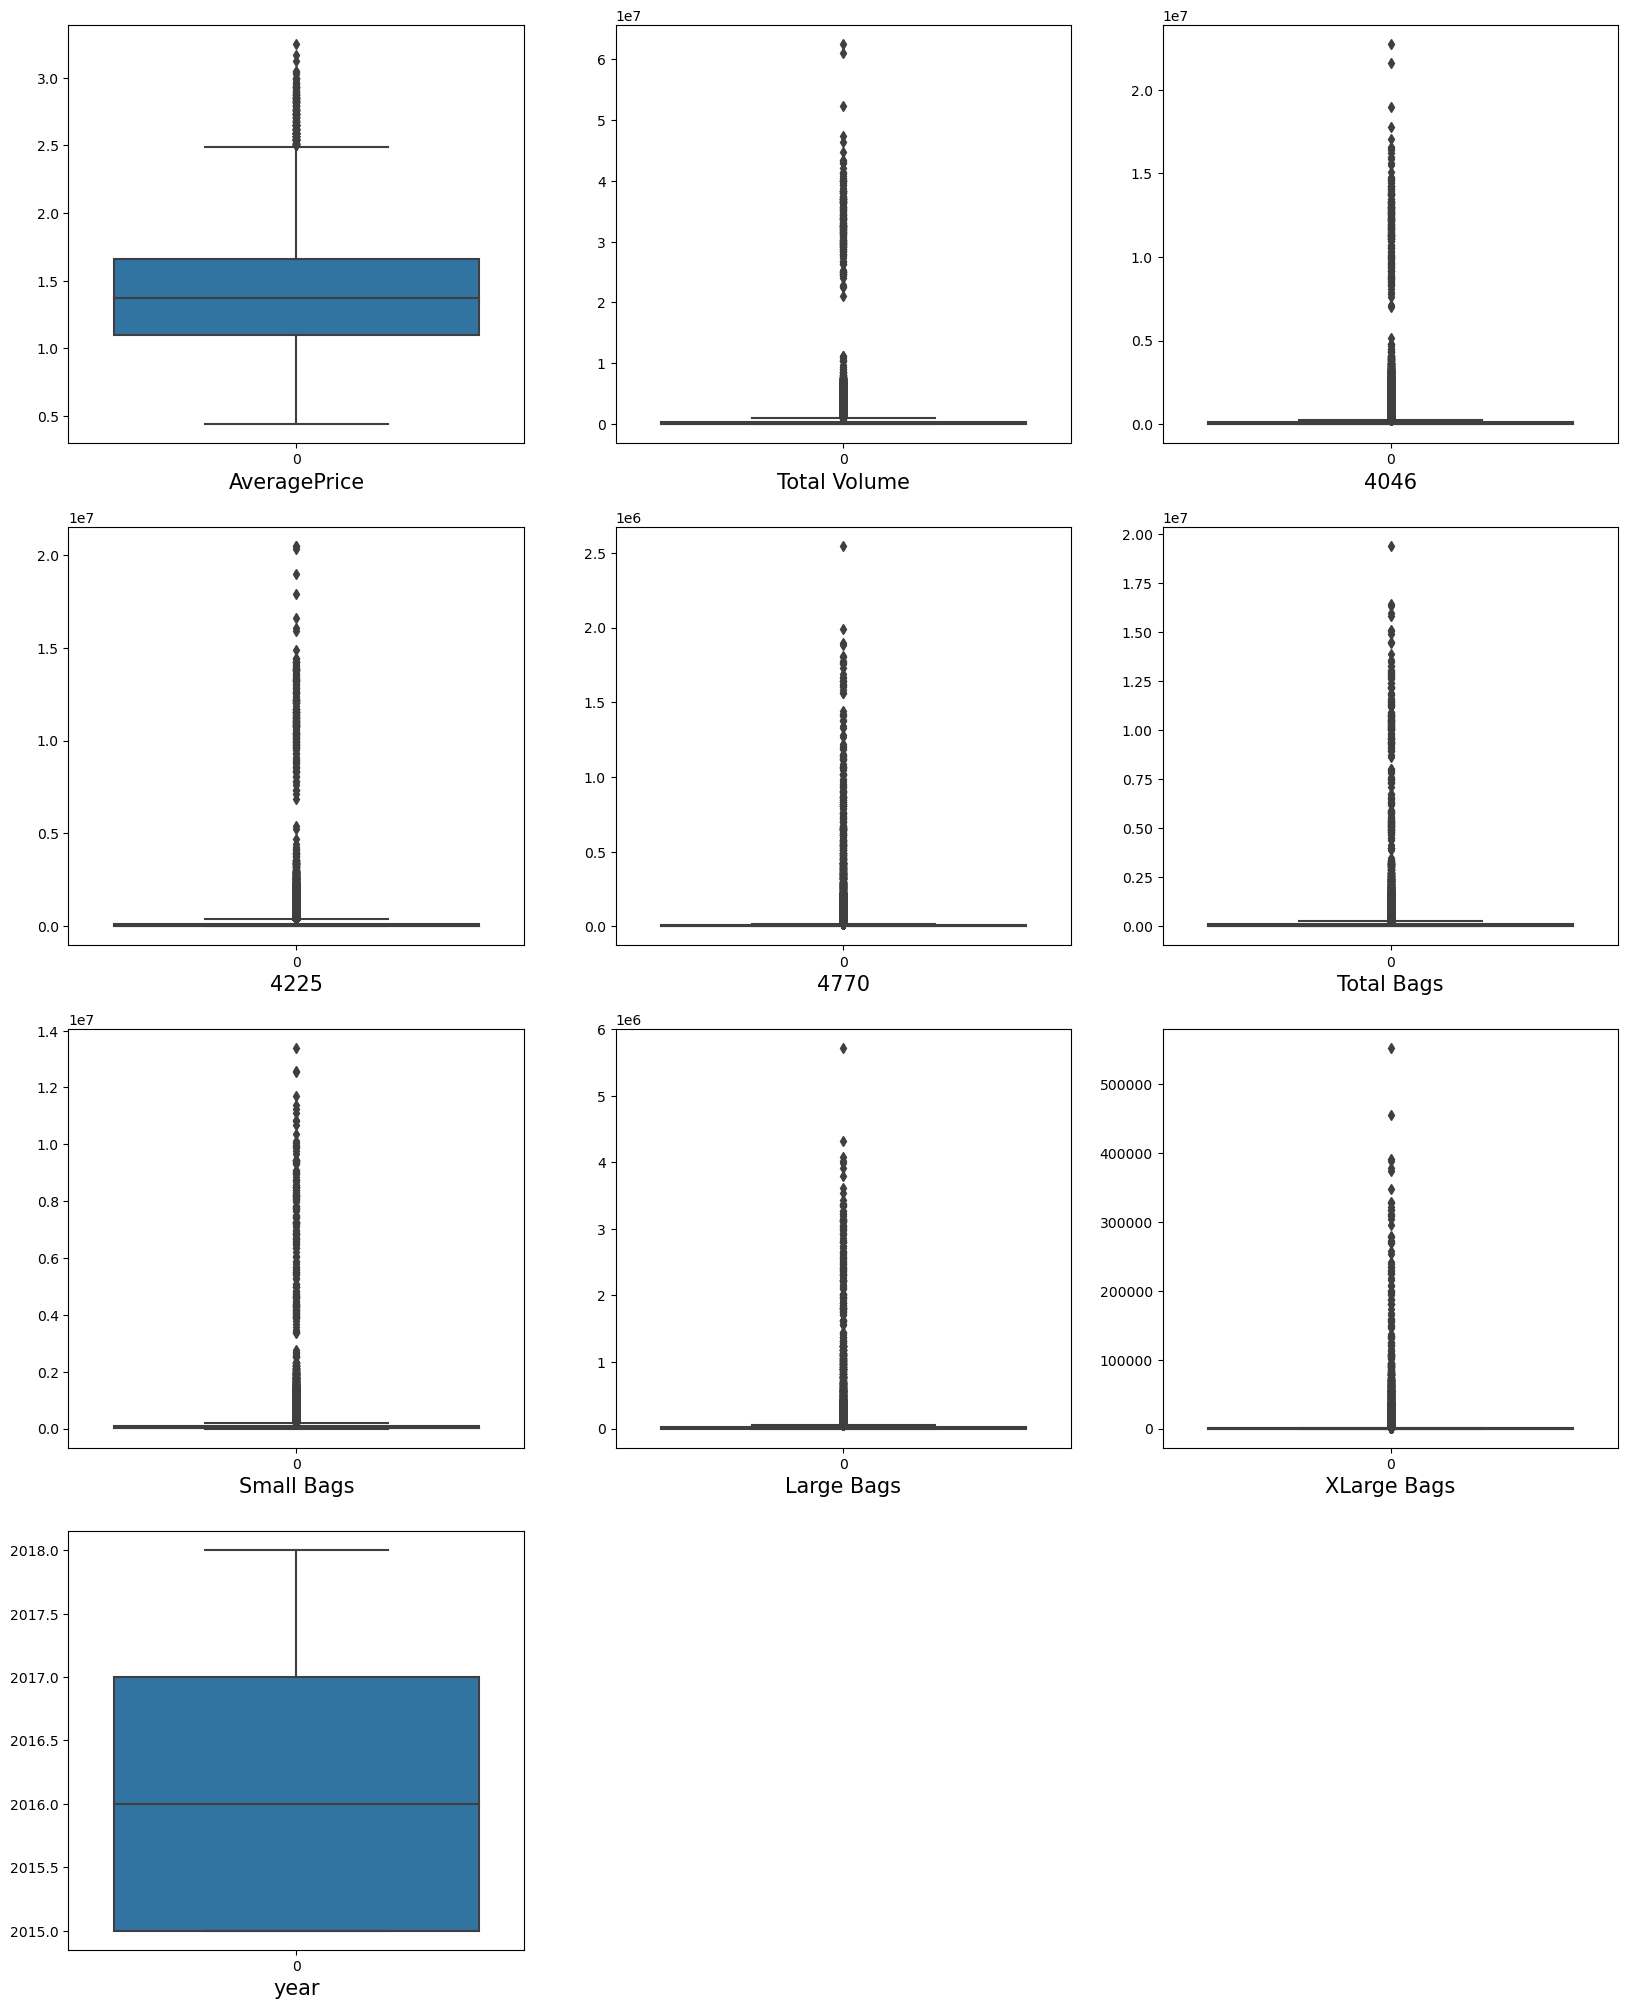

In [86]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

There are a large number of outliers present in all the features that is needed to be removed.

# Encoding categorical columns

In [87]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df        

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  int64  
 11  region        18249 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB


we have converted, the categorical columns into numerical columns using OrdinalEncoding method

# removing outliers

In [89]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(18249, 12)

In [90]:
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [91]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(18249, 12)
(17651, 12)


In [92]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print(loss)

3.276891884486821


3.27% data loss

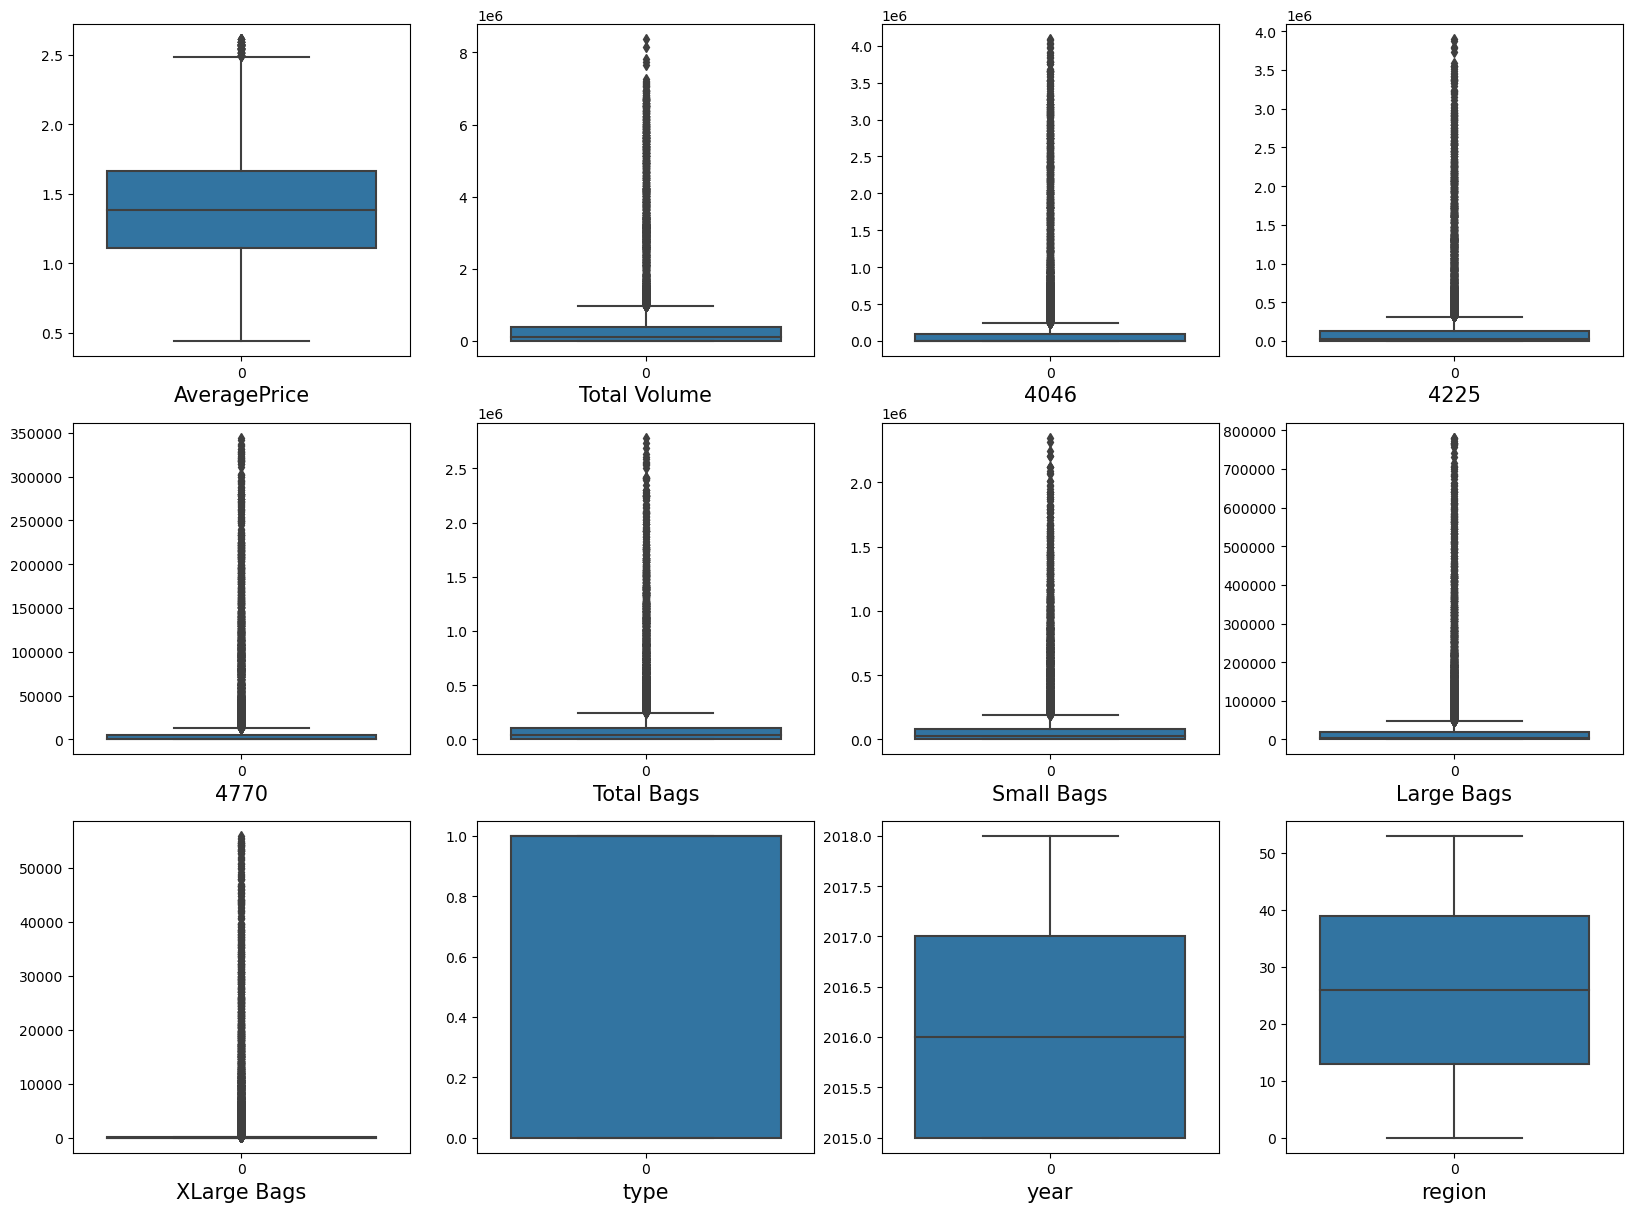

In [93]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=20:
        ac=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

In [94]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,4.612232e+05,1.546436e+05,1.656009e+05,11160.558411,1.298160e+05,1.006283e+05,27830.325482,1357.351712,0.509433,2016.137669,26.103110
std,0.385793,1.012727e+06,4.395780e+05,3.991041e+05,34488.049314,2.821081e+05,2.295134e+05,73026.707330,5240.345626,0.499925,0.940239,15.396005
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,1.110000,1.056651e+04,8.219250e+02,2.889740e+03,0.000000,4.959780e+03,2.746415e+03,112.660000,0.000000,0.000000,2015.000000,13.000000
50%,1.380000,1.002071e+05,7.785240e+03,2.670378e+04,163.960000,3.756260e+04,2.454157e+04,2448.660000,0.000000,1.000000,2016.000000,26.000000
75%,1.660000,3.911843e+05,9.840492e+04,1.288019e+05,5284.600000,1.020218e+05,7.838981e+04,19089.250000,73.670000,1.000000,2017.000000,39.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,1.000000,2018.000000,53.000000


# correlation between target variable and independent variables.

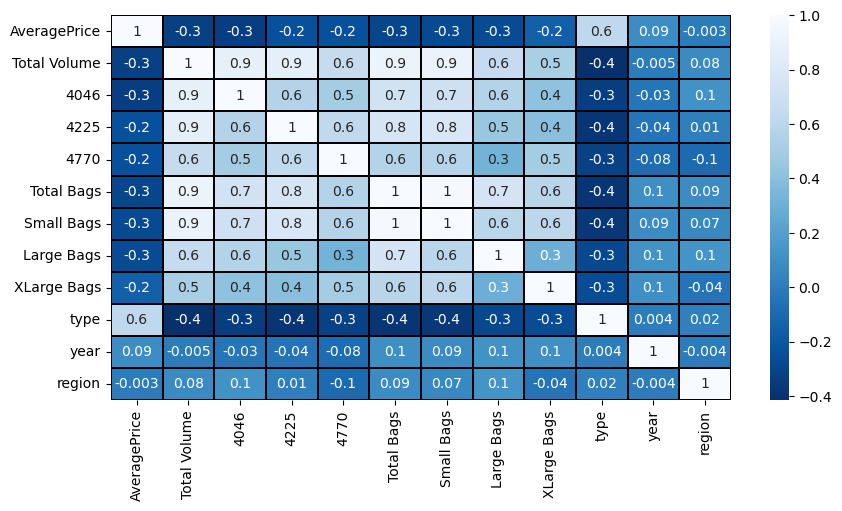

In [95]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

after seeing we found there is multicollinearity present

# seperating features and label

In [96]:
x=df1.drop("region",axis=1)
y=df1["region"]

# Feature Scaling using Standard Scalarization

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.195352,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.210013
1,-0.143510,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.210013
2,-1.232207,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.210013
3,-0.843387,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.210013
4,-0.324959,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,0.981309,1.980756
17647,0.789660,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,0.981309,1.980756
17648,1.204402,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,0.981309,1.980756
17649,1.359930,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,0.981309,1.980756


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.701523e+00,AveragePrice
1,4.126630e+08,Total Volume
2,7.774546e+07,4046
3,6.408757e+07,4225
4,4.785810e+05,4770
5,1.924615e+13,Total Bags
6,1.274003e+13,Small Bags
7,1.290615e+12,Large Bags
8,6.645982e+09,XLarge Bags
9,1.804286e+00,type


In [99]:
x.drop(["Total Bags"],axis=1,inplace=True)
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.701522e+00,AveragePrice
1,4.126609e+08,Total Volume
2,7.774507e+07,4046
3,6.408724e+07,4225
4,4.785785e+05,4770
5,2.119644e+07,Small Bags
6,2.145756e+06,Large Bags
7,1.103658e+04,XLarge Bags
8,1.804153e+00,type
9,1.104850e+00,year


In [100]:
y.value_counts()

0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
35.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
18.0    338
27.0    338
8.0     338
2.0     338
13.0    338
12.0    338
11.0    338
4.0     338
5.0     338
10.0    338
9.0     338
20.0    337
1.0     337
28.0    337
33.0    336
41.0    336
40.0    336
14.0    336
50.0    336
31.0    335
24.0    335
25.0    333
48.0    333
21.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    292
6.0     290
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

# Oversampling

In [101]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x,y)

In [102]:
# Checking value count of target column
y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
52.0    338
53.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
51.0    338
Name: region, dtype: int64

# finding the best random state

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         # maximum accuracy
maxRS=0           # maximum random state
for i in range(10,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)   
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)

 Best accuracy is 0.9174579985390796 at random_state 18


# creating train test split

In [104]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# classification Algorithms

In [105]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [106]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9121621621621622
[[ 92   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0 103   0]
 [  0   1   0 ...   0   0  71]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       102
         1.0       0.83      0.93      0.88        99
         2.0       0.98      0.95      0.97       104
         3.0       0.88      0.89      0.88       102
         4.0       0.96      0.97      0.96        95
         5.0       0.89      0.81      0.85       100
         6.0       0.99      0.97      0.98       113
         7.0       0.90      0.87      0.88        97
         8.0       0.98      0.95      0.97        88
         9.0       0.90      0.88      0.89       101
        10.0       0.91      0.87      0.89        95
        11.0       0.93      0.98      0.95       105
        12.0       0.94      0.99      0.96       110
        13.0       0.86      0.8

In [107]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.40010956902848793
[[40  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  2 46 ...  0  0  0]
 ...
 [ 0  0  0 ... 82  2  0]
 [ 0  0  0 ...  0 85  0]
 [ 0  3  0 ...  0  0 25]]
              precision    recall  f1-score   support

         0.0       0.45      0.39      0.42       102
         1.0       0.32      0.37      0.35        99
         2.0       0.77      0.44      0.56       104
         3.0       0.23      0.45      0.30       102
         4.0       0.51      0.29      0.37        95
         5.0       0.38      0.28      0.32       100
         6.0       0.66      0.67      0.66       113
         7.0       0.19      0.44      0.26        97
         8.0       0.72      0.49      0.58        88
         9.0       0.37      0.49      0.42       101
        10.0       0.11      0.17      0.13        95
        11.0       0.50      0.43      0.46       105
        12.0       0.79      0.45      0.58       110
        13.0       0.71      0.38      0.50        91
        14.0 

In [108]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.40723155588020454
[[15  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  2]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 87  0  0]
 [ 0  0  0 ...  0 89  0]
 [ 0  0  0 ...  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.26      0.15      0.19       102
         1.0       0.62      0.45      0.53        99
         2.0       0.98      0.42      0.59       104
         3.0       0.40      0.33      0.36       102
         4.0       0.67      0.40      0.50        95
         5.0       0.32      0.19      0.24       100
         6.0       0.84      0.65      0.73       113
         7.0       0.13      0.27      0.18        97
         8.0       0.19      0.52      0.28        88
         9.0       0.80      0.41      0.54       101
        10.0       0.41      0.17      0.24        95
        11.0       0.22      0.61      0.32       105
        12.0       0.81      0.49      0.61       110
        13.0       0.82      0.40      0.53        91
        14.0 

In [109]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.835281227173119
[[ 84   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   2]
 [  0   0  96 ...   0   0   2]
 ...
 [  0   0   0 ...  83   1   0]
 [  0   0   0 ...   0 100   0]
 [  0   1   1 ...   0   0  66]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       102
         1.0       0.69      0.79      0.74        99
         2.0       0.96      0.92      0.94       104
         3.0       0.82      0.85      0.84       102
         4.0       0.83      0.89      0.86        95
         5.0       0.72      0.73      0.73       100
         6.0       0.99      0.93      0.96       113
         7.0       0.85      0.85      0.85        97
         8.0       0.99      0.90      0.94        88
         9.0       0.88      0.85      0.86       101
        10.0       0.78      0.74      0.76        95
        11.0       0.90      0.90      0.90       105
        12.0       0.88      0.89      0.89       110
        13.0       0.80      0.81

In [110]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.07742878013148284
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 52]
 [ 0  0  0 ...  0 53  0]
 ...
 [ 0  0 87 ...  0  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0 20 33]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       102
         1.0       0.00      0.00      0.00        99
         2.0       0.00      0.00      0.00       104
         3.0       0.00      0.00      0.00       102
         4.0       0.12      0.24      0.16        95
         5.0       0.11      0.14      0.13       100
         6.0       0.00      0.00      0.00       113
         7.0       0.67      0.02      0.04        97
         8.0       0.00      0.00      0.00        88
         9.0       0.00      0.00      0.00       101
        10.0       0.00      0.00      0.00        95
        11.0       0.33      0.03      0.05       105
        12.0       0.00      0.00      0.00       110
        13.0       0.05      0.49      0.09        91
        14.0 

In [111]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8703433162892622
[[ 85   0   0 ...   0   0   0]
 [  0  87   0 ...   0   0   1]
 [  0   0  96 ...   0   0   1]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0 101   0]
 [  0   1   2 ...   0   0  61]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       102
         1.0       0.76      0.88      0.81        99
         2.0       0.90      0.92      0.91       104
         3.0       0.85      0.87      0.86       102
         4.0       0.91      0.97      0.94        95
         5.0       0.79      0.77      0.78       100
         6.0       0.99      0.96      0.97       113
         7.0       0.83      0.90      0.86        97
         8.0       0.91      0.92      0.92        88
         9.0       0.88      0.87      0.88       101
        10.0       0.75      0.82      0.78        95
        11.0       0.88      0.94      0.91       105
        12.0       0.94      0.93      0.94       110
        13.0       0.86      0.8

In [112]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9254930606281958
[[ 95   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0 103   0]
 [  0   1   0 ...   0   0  75]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       102
         1.0       0.83      0.89      0.86        99
         2.0       0.96      1.00      0.98       104
         3.0       0.92      0.91      0.92       102
         4.0       0.96      0.99      0.97        95
         5.0       0.92      0.84      0.88       100
         6.0       0.99      0.98      0.99       113
         7.0       0.91      0.94      0.92        97
         8.0       1.00      0.98      0.99        88
         9.0       0.83      0.89      0.86       101
        10.0       0.86      0.92      0.89        95
        11.0       0.96      0.98      0.97       105
        12.0       0.96      0.97      0.96       110
        13.0       0.90      0.8

# cross valdation score

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.70446453 0.83730485 0.77178082 0.7060274  0.54356164]
0.7126278482532464
Difference between Accuracy score and cross validation score is- 0.19953431390891574


In [115]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score.mean())

[0.46233909 0.5620378  0.35369863 0.12410959 0.12575342]
0.3255877053762715
Difference between Accuracy score and cross validation score is- 0.07452186365221641


In [116]:
# checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.58121063 0.77786908 0.73178082 0.65178082 0.45589041]
0.6397063517970306
Difference between Accuracy score and cross validation score is- 0.19557487537608842


In [117]:
# checking cv score for Support vector machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

[0.48178581 0.5623117  0.34684932 0.09506849 0.11150685]
0.3195044330132859
Difference between Accuracy score and cross validation score is- 0.08772712286691864


In [118]:
# checking cv score for Adaboost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.04053684 0.05067105 0.06821918 0.04630137 0.05753425]
0.052652536554068506
Difference between Accuracy score and cross validation score is- 0.024776243577414335


In [119]:
# checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.62284306 0.78307313 0.72328767 0.65342466 0.50575342]
0.6576763881541181
Difference between Accuracy score and cross validation score is- 0.2126669281351441


In [120]:
# checking cv score for Support ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.73678444 0.8312791  0.76849315 0.7090411  0.46109589]
0.7013387362441516
Difference between Accuracy score and cross validation score is- 0.22415432438404426


Extratreeclassifier is our best model

# Hyper parameter tuning

In [121]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [122]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [123]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [124]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [125]:
Final_model=ExtraTreesClassifier(criterion='entropy',
 max_depth= 20,
 n_estimators= 300,
 n_jobs=-2,
 random_state= 1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.41709276844412


on hyperparameter tuning accuracy is decreasing. so we are using the model without tuning

In [127]:
Final_model=ExtraTreesClassifier()
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.45799853907963


# saving the model

In [128]:
# saving the model using joblib and .pkl extension
import joblib
joblib.dump(Final_model,"avocado region prediction.pkl")

['avocado region prediction.pkl']

# predicting by using the saved model

In [129]:
# lets load the saved model and get the prediction
model=joblib.load('avocado region prediction.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([ 0., 24., 52., ..., 15., 28., 48.])

# check how my model is behaving

In [130]:
a=np.array(y_test)
df= pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0.0,0.0
1,24.0,24.0
2,52.0,52.0
3,50.0,31.0
4,28.0,28.0
...,...,...
5471,19.0,19.0
5472,37.0,7.0
5473,15.0,15.0
5474,28.0,28.0
